# Sberbank Russian Housing Market: Exploratory Data Analysis

# Problem Statement : 

# We have given the data from the year 2011 to 2015 and we have to predict the housing prices for the upcoming year.

#  How Our Model Helps: 

# Our Model forecasting will allow Sberbank to provide more certainty to their customers in an uncertain economy. 

# By forecasting the price we will avoid the risk of overlending and our prediction will give the confidence to lenders,developers and renters when they sign a lease or purchase a building.

# In This Notebook we will try to analyse the data like how many percentage of data is missing, we will also do feature extraction and will analyse only the important feature. We will try to find out if our data is correlated or not if yes then we will remove the higly correlated features.

In [80]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6392/44054/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600236136&Signature=lswNs0nR9kNUKidyukdDY6lFqV6Fxo27ySOS3HprasC00qv1ZIW%2Fqp2w0fBjDFWaVfDi%2BCiVIxR%2FXJAmrXB2nKYtTPYrNGo8j0xWZZg4SN433aWXxGcjAEO9039JWH2CcfL%2FeYZDjOSromp%2Fw5gg5jZccT%2Fl%2F5LAUS5ONc3BkBul1zkmLo%2FtXQi4yfUkR5MQ9Qbu%2B5gs786%2FlN1kW5jhU2qbhXQhw0UUKjiyRpZRkEswCDNDm%2BUEtxgGw1%2FVFP81B49ZcjkQAOZAzl2gISoCFp4KJyMv3RCZqVgI6nK%2Bne2YQ5iiDwwNROpHusQa7OezqkBv7afEJl6d7610yGAq2A%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2020-09-13 10:40:34--  https://storage.googleapis.com/kagglesdsdata/competitions/6392/44054/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600236136&Signature=lswNs0nR9kNUKidyukdDY6lFqV6Fxo27ySOS3HprasC00qv1ZIW%2Fqp2w0fBjDFWaVfDi%2BCiVIxR%2FXJAmrXB2nKYtTPYrNGo8j0xWZZg4SN433aWXxGcjAEO9039JWH2CcfL%2FeYZDjOSromp%2Fw5gg5jZccT%2Fl%2F5LAUS5ONc3BkBul1zkmLo%2FtXQi4yfUkR5MQ9Qbu%2B5gs786%2FlN1kW5jhU2qbhXQhw0UUKjiyRpZRkEswCDNDm%2BUEtxgGw1%2FVFP81B49ZcjkQAOZAzl2gISoCFp4KJyMv3RCZqVgI6nK%2Bne2YQ5iiDwwNROpHusQa7OezqkBv7afEJl6d7610yGAq2A%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 74.125.206.128, 64.233.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17919166 (17M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip       100%[========

In [81]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
replace __MACOSX/._train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/._train.csv    


In [82]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn import preprocessing 

In [83]:
train_data = pd.read_csv("train.csv", parse_dates=['timestamp'])

In [84]:
print("Number of data points in train.csv file is: ",train_data.shape)

Number of data points in train.csv file is:  (30471, 292)


# Let take a look about the data 

In [85]:
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', 300)
train_data.head()

id  timestamp  full_sq   life_sq    floor  max_floor  material  build_year  \
0   1 2011-08-20       43 27.000000 4.000000        nan       nan         nan   
1   2 2011-08-23       34 19.000000 3.000000        nan       nan         nan   
2   3 2011-08-27       43 29.000000 2.000000        nan       nan         nan   
3   4 2011-09-01       89 50.000000 9.000000        nan       nan         nan   
4   5 2011-09-05       77 77.000000 4.000000        nan       nan         nan   

   num_room  kitch_sq  state product_type           sub_area          area_m  \
0       nan       nan    nan   Investment           Bibirevo  6407578.100000   
1       nan       nan    nan   Investment  Nagatinskij Zaton  9589336.912000   
2       nan       nan    nan   Investment     Tekstil'shhiki  4808269.831000   
3       nan       nan    nan   Investment             Mitino 12583535.690000   
4       nan       nan    nan   Investment          Basmannoe  8398460.622000   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572         0.189727     0.000070                9576   
1       115352         0.372602     0.049637                6880   
2       101708         0.112560     0.118537                5879   
3       178473         0.194703     0.069753               13087   
4       108171         0.015234     0.037316                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0      5001.000000                                  5            10309   
1      3119.000000                                  5             7759   
2      1463.000000                                  4             6207   
3      6839.000000                                  9            13670   
4      3240.000000                                  7             6748   

   school_quota  school_education_centers_raion  \
0  11065.000000                               5   
1   6237.000000                               8   
2   5580.000000                               7   
3  17063.000000                              10   
4   7770.000000                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0           240.000000   
1                                      0           229.000000   
2                                      0          1183.000000   
3                                      0                  nan   
4                                      0           562.000000   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no       

In [86]:
train_data.describe()

id      full_sq      life_sq        floor    max_floor  \
count 30471.000000 30471.000000 24088.000000 30304.000000 20899.000000   
mean  15237.917397    54.214269    34.403271     7.670803    12.558974   
std    8796.501536    38.031487    52.285733     5.319989     6.756550   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    7620.500000    38.000000    20.000000     3.000000     9.000000   
50%   15238.000000    49.000000    30.000000     6.500000    12.000000   
75%   22855.500000    63.000000    43.000000    11.000000    17.000000   
max   30473.000000  5326.000000  7478.000000    77.000000   117.000000   

          material      build_year     num_room     kitch_sq        state  \
count 20899.000000    16866.000000 20899.000000 20899.000000 16912.000000   
mean      1.827121     3068.057097     1.909804     6.399301     2.107025   
std       1.481154   154387.795637     0.851805    28.265979     0.880148   
min       1.000000        0.000000     0.000000     0.000000     1.000000   
25%       1.000000     1967.000000     1.000000     1.000000     1.000000   
50%       1.000000     1979.000000     2.000000     6.000000     2.000000   
75%       2.000000     2005.000000     2.000000     9.000000     3.000000   
max       6.000000 20052009.000000    19.000000  2014.000000    33.000000   

                area_m   raion_popul  green_zone_part  indust_part  \
count     30471.000000  30471.000000     30471.000000 30471.000000   
mean   17657051.421491  84056.425552         0.218922     0.118871   
std    20649607.990037  57871.285899         0.175090     0.118688   
min     2081627.761000   2546.000000         0.001879     0.000000   
25%     7307410.574000  21819.000000         0.063755     0.019509   
50%    10508030.100000  83502.000000         0.167526     0.072158   
75%    18036436.510000 122862.000000         0.336177     0.195781   
max   206071809.200000 247469.000000         0.852923     0.521867   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
count        30471.000000     23783.000000                       30471.000000   
mean          5140.026156      3271.272464                           4.065111   
std           3816.625140      2169.759592                           2.993795   
min            175.000000         0.000000                           0.000000   
25%           1706.000000      1874.000000                           2.000000   
50%           4857.000000      2854.000000                           4.000000   
75%           7103.000000      4050.000000                           6.000000   
max          19223.000000     11926.000000                          13.000000   

       children_school  school_quota  school_education_centers_raion  \
count     30471.000000  23786.000000                    30471.000000   
mean       5354.269699   8324.970739                        4.705031   
std        3989.640917   4289.734174                        3.445105   
min         168.000000   1012.000000                        0.000000   
25%        1564.000000   5782.000000                        2.000000   
50%        5261.000000   7377.000000                        5.000000   
75%        7227.000000   9891.000000                        7.000000   
max       19083.000000  24750.000000                       14.000000   

       school_education_centers_top_20_raion  hospital_beds_raion  \
count                           30471.000000         16030.000000   
mean                                0.109678          1190.738677   
std                                 0.333328          1057.015001   
min                                 0.000000             0.000000   
25%                                 0.000000           520.000000   
50%                                 0.000000           990.000000   
75%                                 0.000000          1786.000000   
max                                 2.000000          4849.000000   

       healthcare_cente

# Missing Values Analysis

In [87]:
missing_values = ((train_data.isna().sum())/train_data.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)
missing_values.head(55)

hospital_beds_raion                     47.392603
build_year                              44.649011
state                                   44.498047
cafe_avg_price_500                      43.585704
cafe_sum_500_max_price_avg              43.585704
cafe_sum_500_min_price_avg              43.585704
max_floor                               31.413475
material                                31.413475
num_room                                31.413475
kitch_sq                                31.413475
preschool_quota                         21.948738
school_quota                            21.938893
cafe_sum_1000_min_price_avg             21.410521
cafe_sum_1000_max_price_avg             21.410521
cafe_avg_price_1000                     21.410521
life_sq                                 20.947786
build_count_frame                       16.379508
build_count_1971-1995                   16.379508
build_count_block                       16.379508
raion_build_count_with_material_info    16.379508


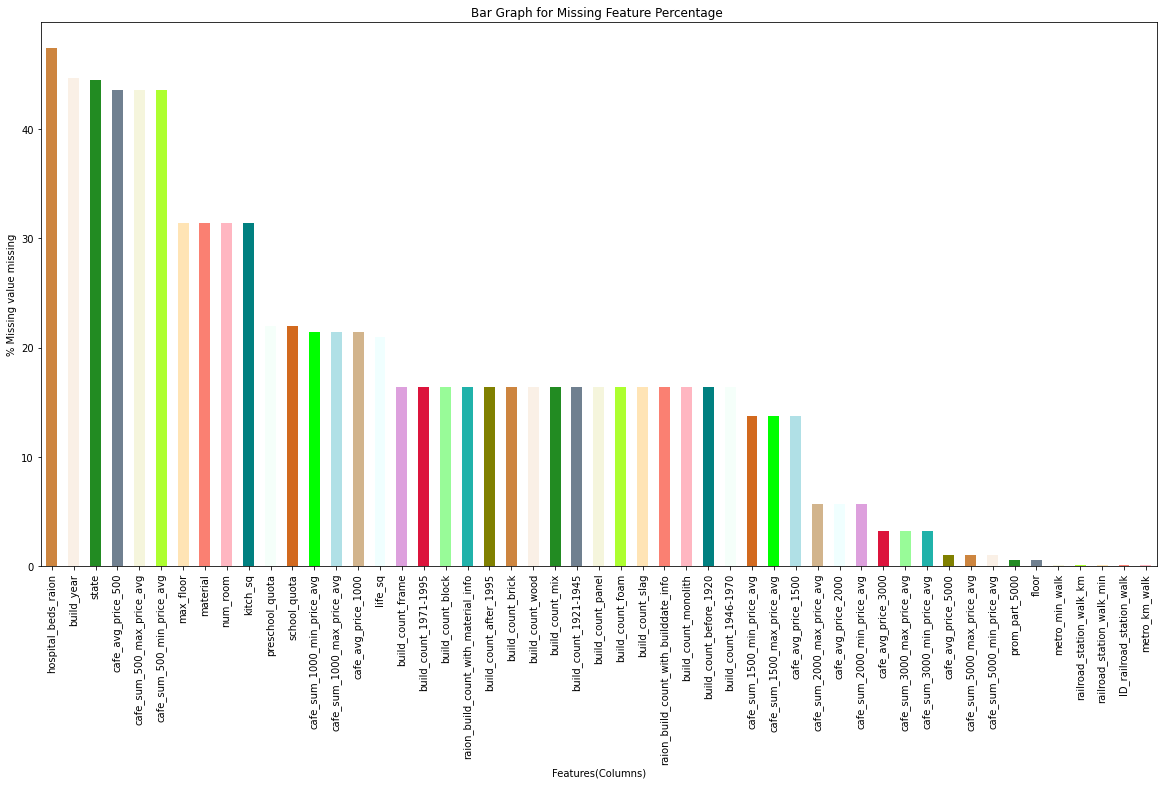

In [88]:
# Plot all the Missing Values in Decending Order
%matplotlib inline

missing_values = missing_values.drop(missing_values[missing_values == 0].index)

colour = ['peru','linen','forestgreen','slategray','beige','greenyellow','moccasin','salmon','lightpink','teal',
          'mintcream','chocolate','lime','powderblue','tan','azure','plum','crimson','palegreen','lightseagreen','olive']

plt.figure(figsize=(20,10))
missing_values.plot.bar(color = colour)
plt.xlabel('Features(Columns)')
plt.ylabel('% Missing value missing')
plt.title('Bar Graph for Missing Feature Percentage ')

plt.show()

# We can see that around 51 columns have missing values, we can either drop all the columns having missing values or can set the threshold that how much percentage of missing values we consider to drop a column.

In [89]:
print(len(missing_values.index))

51


# Univariate Analysis of the response variable(price_doc)

In [90]:
train_data['price_doc'].describe()

count       30471.000000
mean      7123035.277739
std       4780111.329634
min        100000.000000
25%       4740002.000000
50%       6274411.000000
75%       8300000.000000
max     111111112.000000
Name: price_doc, dtype: float64

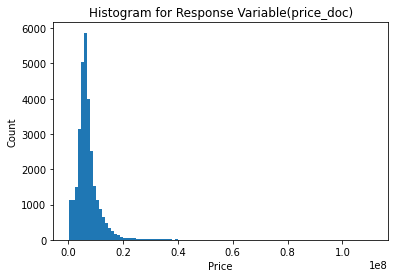

In [91]:
plt.hist(train_data['price_doc'],bins=100)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram for Response Variable(price_doc)')
plt.show()

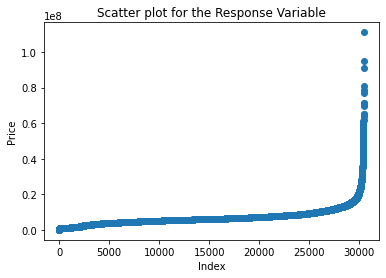

In [92]:
#Scatter plot Analysis

plt.scatter(range(train_data.shape[0]),np.sort(train_data['price_doc'].values))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Scatter plot for the Response Variable')
plt.show()

In [93]:
#Max Price details
train_data[train_data.price_doc==train_data.price_doc.max()]

id  timestamp  full_sq   life_sq     floor  max_floor  material  \
2118  2121 2012-05-10       55 31.000000 12.000000        nan       nan   

      build_year  num_room  kitch_sq  state product_type     sub_area  \
2118         nan       nan       nan    nan   Investment  Teplyj Stan   

             area_m  raion_popul  green_zone_part  indust_part  \
2118 8392316.210000       130396         0.426396     0.002212   

      children_preschool  preschool_quota  preschool_education_centers_raion  \
2118                6980      4523.000000                                  5   

      children_school  school_quota  school_education_centers_raion  \
2118             7614   9443.000000                               6   

      school_education_centers_top_20_raion  hospital_beds_raion  \
2118                                      0                  nan   

      healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
2118                         1                        0                    3   

      additional_education_raion culture_objects_top_25  \
2118                           2                     no   

      culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
2118                             0                       5             3   

     thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
2118                        no                 no                  no   

     radiation_raion railroad_terminal_raion big_market_raion  \
2118             yes                      no              yes   

     nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
2118                    no                       no     90114   47893   

      female_f  young_all  young_male  young_female  work_all  work_male  \
2118     42221      15541        7898          7643     76776      38310   

      work_female  ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  \
2118        38466      38079       12885         25194     6980      3496   

      0_6_female  7_14_all  7_14_male  7_14_female  0_17_all  0_17_male  \
2118        3484      7614       3917         3697     17425       8832   

      0_17_female  16_29_all  16_29_male  16_29_female  0_13_all  0_13_male  \
2118         8593      20655       10812          9843     13682       6913   

      0_13_female  raion_build_count_with_material_info  build_count_block  \
2118         6769                            195.000000          53.000000   

      build_count_wood  build_count_frame  build_count_brick  \
2118          0.000000           0.000000           3.000000   

      build_count_monolith  build_count_panel  build_count_foam  \
2118              8.000000         131.000000          0.000000   

      build_count_slag  build_count_mix  \
2118          0.000000         0.000000   

      raion_build_count_with_builddate_info  build_count_before_1920  \
2118                             196.000000                 0.000000   

      build_count_1921-1945  build_count_1946-1970  build_count_1971-1995  \
2118               0.000000               0.000000             183.000000   

      build_count_after_1995  ID_metro  metro_min_avto  metro_km_avto  \
2118               13.000000        59        1.758636       0.707214   

      metro_min_walk  metro_km_walk  kindergarten_km  school_km  park_km  \
2118        5.692791       0.474399         0.134725   0.432346 0.680753   

      green_zone_km  industrial_km  water_treatment_km  cemetery_km  \
2118       0.197776       1.881615           12.878720     2.033207   

      incineration_km  railroad_station_walk_km  railroad_station_walk_min  \
2118        11.088640                  8.012810                  96.153715   

      ID_railroad_station_walk  railroad_station_avto_km  \
2118                 33.000000                  8.234182   

      railroad_station_avto_min  ID_railroad_station_avto  \
2118                   9.125860                       105   

      pu

Selling price of house in Sub Area TeplyjStan is highest lets check out whether the selling prices of other houses too in this sub area is high or not.

In [94]:
train_data.price_doc[train_data.sub_area == 'Teplyj Stan'].describe()

count         165.000000
mean      8563557.527273
std       8877604.577033
min        990000.000000
25%       6200000.000000
50%       7800000.000000
75%      10000000.000000
max     111111112.000000
Name: price_doc, dtype: float64

# This data set has outlier hence this sub area has no effect on the selling price.

In [95]:
#Min Price details
train_data[train_data.price_doc==train_data.price_doc.min()]

id  timestamp  full_sq   life_sq     floor  max_floor  material  \
20244  20247 2014-06-27       72 37.000000 11.000000  16.000000  1.000000   

       build_year  num_room  kitch_sq    state product_type    sub_area  \
20244 2006.000000  2.000000 12.000000 1.000000   Investment  Gol'janovo   

               area_m  raion_popul  green_zone_part  indust_part  \
20244 14286990.830000       157010         0.389354     0.194489   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
20244                7751      5041.000000                                  6   

       children_school  school_quota  school_education_centers_raion  \
20244             8004  11081.000000                               7   

       school_education_centers_top_20_raion  hospital_beds_raion  \
20244                                      0           125.000000   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
20244                         3                        0                    5   

       additional_education_raion culture_objects_top_25  \
20244                           3                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
20244                             0                       5             3   

      thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
20244                        no                 no                  no   

      radiation_raion railroad_terminal_raion big_market_raion  \
20244             yes                      no               no   

      nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
20244                    no                       no     12327    5588   

       female_f  young_all  young_male  young_female  work_all  work_male  \
20244      6739      16831        8637          8194     98260      47405   

       work_female  ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  \
20244        50855      41919       12424         29495     7751      3941   

       0_6_female  7_14_all  7_14_male  7_14_female  0_17_all  0_17_male  \
20244        3810      8004       4152         3852     18912       9716   

       0_17_female  16_29_all  16_29_male  16_29_female  0_13_all  0_13_male  \
20244         9196       2780        1351          1429     14694       7551   

       0_13_female  raion_build_count_with_material_info  build_count_block  \
20244         7143                            371.000000          88.000000   

       build_count_wood  build_count_frame  build_count_brick  \
20244          0.000000           0.000000          68.000000   

       build_count_monolith  build_count_panel  build_count_foam  \
20244              8.000000         207.000000          0.000000   

       build_count_slag  build_count_mix  \
20244          0.000000         0.000000   

       raion_build_count_with_builddate_info  build_count_before_1920  \
20244                             371.000000                 0.000000   

       build_count_1921-1945  build_count_1946-1970  build_count_1971-1995  \
20244               1.000000             221.000000             129.000000   

       build_count_after_1995  ID_metro  metro_min_avto  metro_km_avto  \
20244               20.000000        20        3.881640       2.541282   

       metro_min_walk  metro_km_walk  kindergarten_km  school_km  park_km  \
20244       30.495384       2.541282         0.278398   0.889795 0.743391   

       green_zone_km  industrial_km  water_treatment_km  cemetery_km  \
20244       0.180514       0.054393           17.407900     0.263572   

       incineration_km  railroad_station_walk_km  railroad_station_walk_min  \
20244        14.388570                  7.125622                  85.507461   

       ID_railroad_station_walk  railroad_station_avto_km  \
20244                 18.000000                  9.374169   

       railroad_station_avto_min  ID_railroad_station_avto  \
20244      

# In this Plot we can clearly see our data has some outliers for the price between 0.8*(1e8) to 1*(1e^8)

# BiVariate Analysis

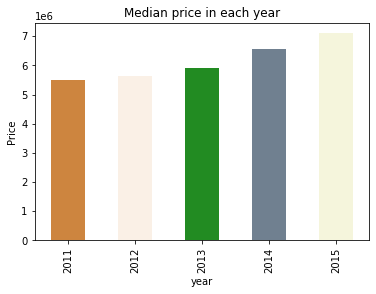

In [96]:
#Visualize the median price over time(year)

train_data['year'] = train_data['timestamp'].map(lambda x: x.year)

colour = ['peru','linen','forestgreen','slategray','beige','greenyellow','moccasin','salmon','lightpink','teal',
          'mintcream','chocolate','lime','powderblue','tan','azure','plum','crimson','palegreen','lightseagreen','olive']


train_data.price_doc.groupby(train_data.year).median().plot.bar(color = colour)

plt.ylabel('Price')
plt.title('Median price in each year')
plt.show()

<h3> We can see that price are continuosly increasing with time. Now lets check month wise also </h3>

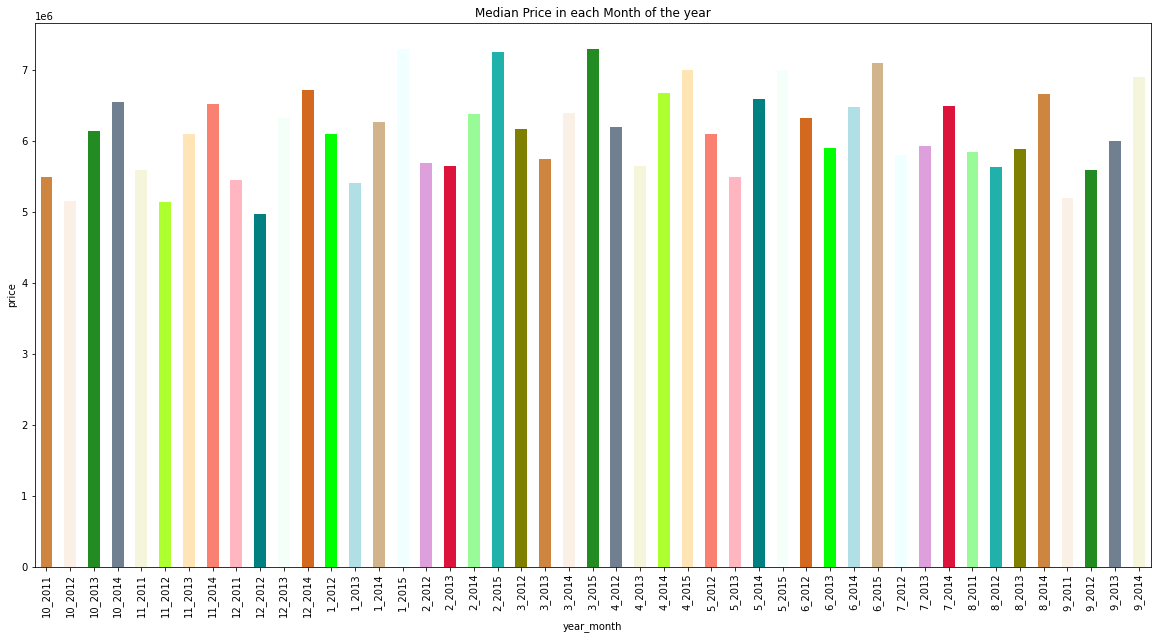

In [97]:
#Visualize the median price over time(year)

train_data['year_month'] = train_data['timestamp'].map(lambda x: str(x.month)+'_'+str(x.year))

colour = ['peru','linen','forestgreen','slategray','beige','greenyellow','moccasin','salmon','lightpink','teal',
          'mintcream','chocolate','lime','powderblue','tan','azure','plum','crimson','palegreen','lightseagreen','olive']

plt.figure(figsize=(20,10))
train_data.price_doc.groupby(train_data.year_month).median().plot.bar(color = colour)
plt.ylabel('price')
plt.title('Median Price in each Month of the year')
plt.show()

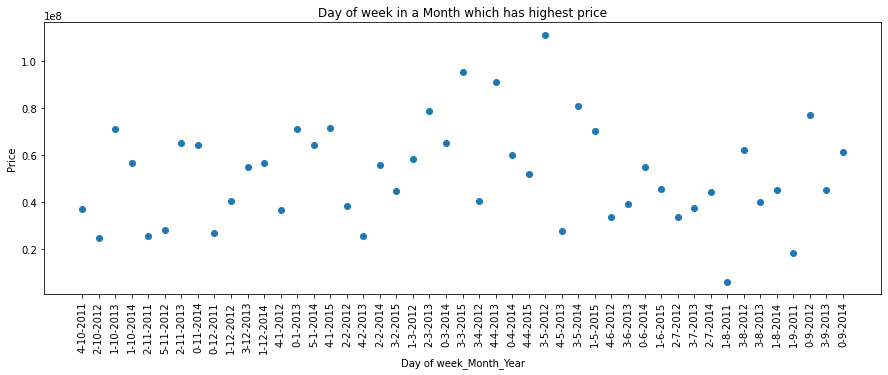

In [98]:
#Visualize the day of week which has higher price
#Day of Week (0-6) => (Monday,Sunday)

train_data['day_of_week'] = train_data['timestamp'].map(lambda x: str(x.weekday())+'-'+str(x.month)+'-'+str(x.year))


index = train_data.price_doc.groupby(train_data.year_month).idxmax()

plt.figure(figsize=(15,5))
plt.scatter([train_data.iloc[i].day_of_week for i in index],[train_data.iloc[i].price_doc for i in index])
plt.xticks(rotation='90')
plt.xlabel('Day of week_Month_Year')
plt.ylabel('Price')
plt.title('Day of week in a Month which has highest price')

plt.show()

# We can see that prices of the house are high mainly on week days<br>

# 1. Which district has the highest average price selling price?

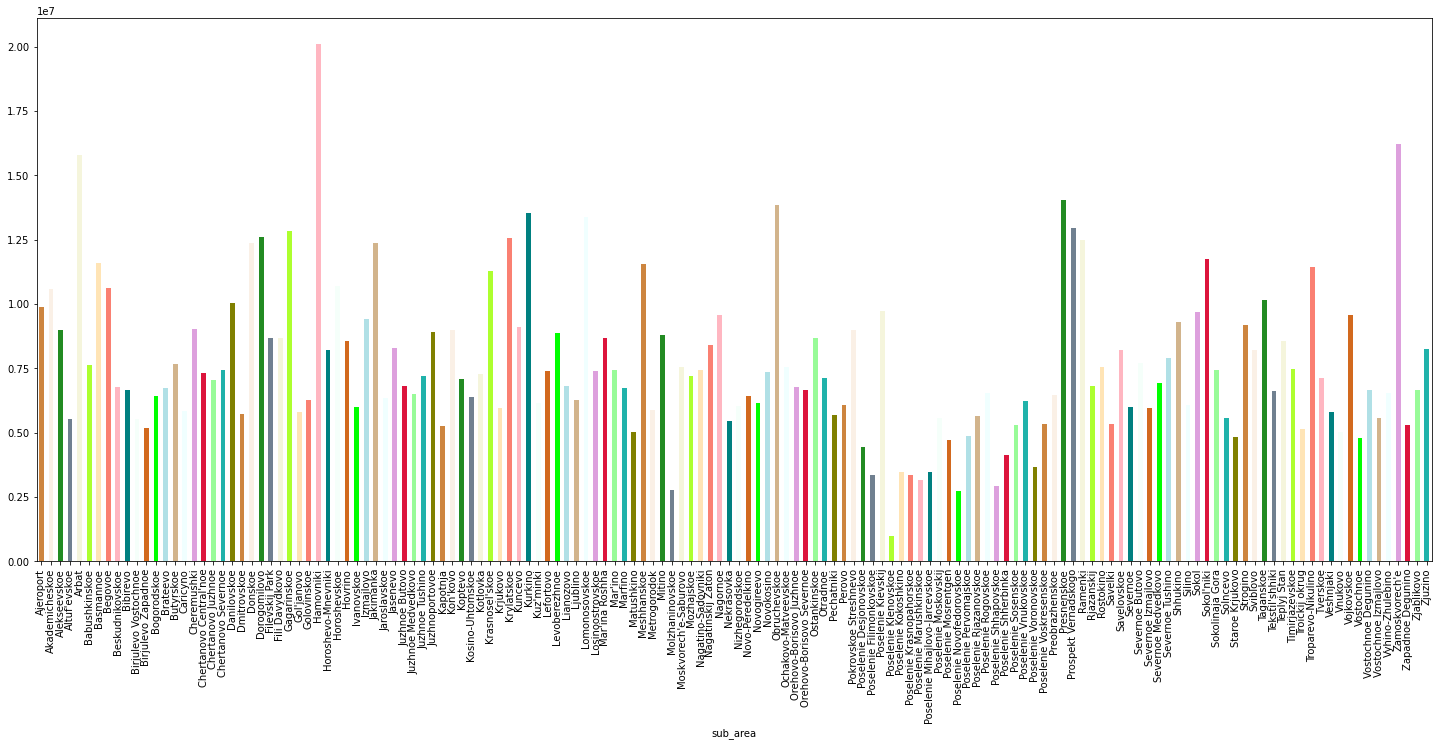

In [99]:
#Visualization of graph between subarea and price.

plt.figure(figsize=(25,10))
train_data.price_doc.groupby(train_data.sub_area).mean().plot.bar(color = colour)
plt.show()

# District having highest average price is Hamovniki and the lowest average price is Poselenie Klenovskoe, we can clearly see this from graph lets fetch the same with the help of code we should get the same results.

In [100]:
arr = np.argsort(train_data.price_doc.groupby(train_data.sub_area).mean())

print("The district having highest average price is : ",arr.index[arr[-1]])
print("And the highest average price of the district "+arr.index[arr[-1]]+" is "+str(train_data.price_doc.groupby(train_data.sub_area).mean()[arr[-1]]))

print('*'*100)
print("The district having Lowest average price is : ",arr.index[arr[0]])
print("And the Lowest average price of the district "+arr.index[arr[0]]+" is "+str(train_data.price_doc.groupby(train_data.sub_area).mean()[arr[0]]))

The district having highest average price is :  Hamovniki
And the highest average price of the district Hamovniki is 20116565.544444446
****************************************************************************************************
The district having Lowest average price is :  Poselenie Klenovskoe
And the Lowest average price of the district Poselenie Klenovskoe is 1000000.0


# 2. What is the average selling price in each district on each day of the week and identify the day of week having highest average selling price

In [101]:
#Day of Week (0-6) => (Monday,Sunday)

train_data['day_of_week'] = train_data['timestamp'].map(lambda x: x.weekday())
train_data['day_of_week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'},inplace = True)

output = train_data.groupby([train_data.sub_area,train_data.day_of_week]).agg({'price_doc':lambda x: x.mean()})

col = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']
index = train_data.sub_area.unique()
index.sort()

df = pd.DataFrame(columns=col,index=index)

#print(df.loc['Ajeroport'].Sunday)

for (ind, row) in df.iterrows():
   
   temp = list(output.loc[ind].index)
   
   for i in col:
     if i not in temp:
       df.loc[ind][i] = 0
     else:
       df.loc[ind][i] = output.loc[ind].loc[i].values[0]
   

df.head(10)

Monday         Tuesday       Wednesday  \
Ajeroport        7376140.315789  9557777.777778 10037812.500000   
Akademicheskoe   9665771.707317 11788400.000000 10618815.117647   
Alekseevskoe     8166140.000000  9393333.333333  8008971.450000   
Altuf'evskoe     3628076.923077  6676666.666667  6018208.846154   
Arbat           26824000.000000 16150000.000000 10630000.000000   
Babushkinskoe    7187815.434783  7127481.000000  6780714.000000   
Basmannoe       10151327.214286 14096813.333333 10466958.823529   
Begovoe         11212500.000000 10619230.769231 12505555.555556   
Beskudnikovskoe  6493478.260870  6278103.448276  7022968.550000   
Bibirevo         7026904.761905  6464180.327869  6621530.434783   

                       Thrusday          Friday        Saturday  \
Ajeroport        9899752.791667 11964904.960000  9794166.666667   
Akademicheskoe  10564204.769231 10295507.052632 10559937.500000   
Alekseevskoe     7607803.736842 11836453.000000  8700000.000000   
Altuf'evskoe     5636363.636364  5781818.181818  4790000.000000   
Arbat           12850000.000000 15100000.000000               0   
Babushkinskoe    6989074.736842  8986629.615385  9338672.636364   
Basmannoe       11129115.210526 12544859.200000  8573750.000000   
Begovoe         10871101.266667  7680000.000000  8466666.666667   
Beskudnikovskoe  6593939.393939  7816071.428571  5885833.333333   
Bibirevo         6018179.000000  7133846.153846  6778333.333333   

                         Sunday  
Ajeroport        9000000.000000  
Akademicheskoe  11300000.000000  
Alekseevskoe                  0  
Altuf'evskoe                  0  
Arbat                         0  
Babushkinskoe                 0  
Basmannoe        9000000.000000  
Begovoe                       0  
Beskudnikovskoe  4500000.000000  
Bibirevo                      0

In [102]:
for i in col:
  print('Highest Selling price for '+i+' is '+ str(df[i].max()))

Highest Selling price for Monday is 26824000.0
Highest Selling price for Tuesday is 20257692.307692308
Highest Selling price for Wednesday is 21536916.8
Highest Selling price for Thrusday is 24738463.09090909
Highest Selling price for Friday is 25085417.0
Highest Selling price for Saturday is 17156250.0
Highest Selling price for Sunday is 13500000.0


# Monday has the highest Average selling price while Saturday and Sunday have the lowest average selling price. Hence we can say that on weekends has the lowest price.

# 3. Does weekend has any effect on average selling price for each district?
# We can see from our data frame that saturday and sunday do have some effect on the selling price for each district like some district reports 0 sale in weekends.

# 4. For apartments, how does the floor impact the selling price? Is there some relationship between floor number and selling price? Let’s say in any apartments the selling price will be high for top floors, so find out if any such relationship holds.

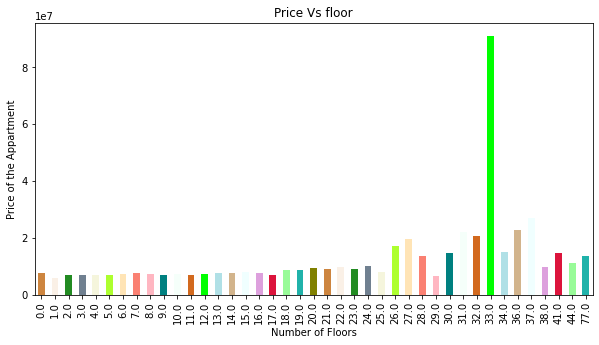

In [103]:
plt.figure(figsize=(10,5))
train_data.price_doc.groupby(train_data.floor).mean().plot.bar(color = colour)

plt.xlabel('Number of Floors')
plt.ylabel('Price of the Appartment')
plt.title('Price Vs floor')
plt.show()

# From this graph it can be concluded that average price for all the apartment is same, the apartment that has 33 floors has the highest average price but it can be the outlier. There is no relationship between the selling price and the Number of floors in the apartment.

# 5. How does total area and living area impact the selling price?

Before Removing Outliers


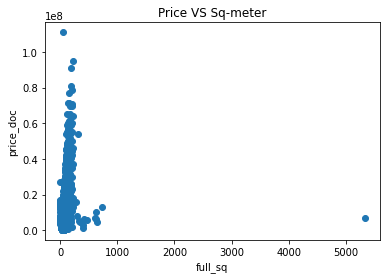

In [104]:
print("Before Removing Outliers")

plt.scatter(train_data.full_sq,train_data.price_doc)
plt.xlabel('full_sq')
plt.ylabel('price_doc')
plt.title('Price VS Sq-meter')
plt.show()

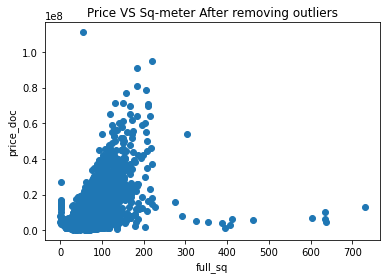

In [105]:
#Removing outliers so that we can see the clear picture
data = train_data[train_data.full_sq<1000]

plt.scatter(data.full_sq,data.price_doc)
plt.xlabel('full_sq')
plt.ylabel('price_doc')
plt.title('Price VS Sq-meter After removing outliers')
plt.show()

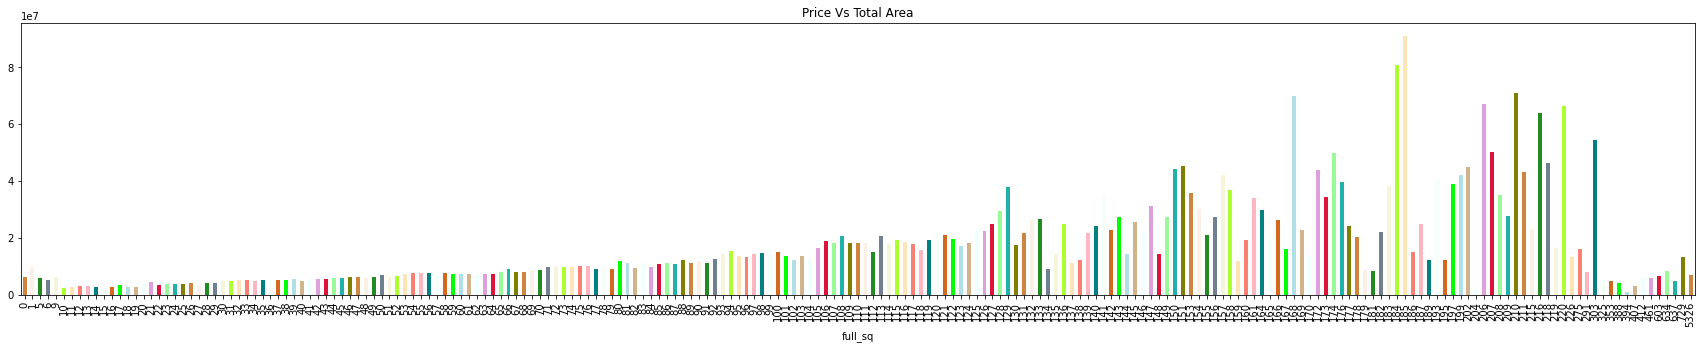

In [106]:
plt.figure(figsize=(30,5))
train_data.price_doc.groupby(train_data.full_sq).mean().plot.bar(color = colour)
plt.title('Price Vs Total Area')
plt.show()

# Although there is no smooth pattern but we can roughly say that with the increase in square meter area the price also increases.

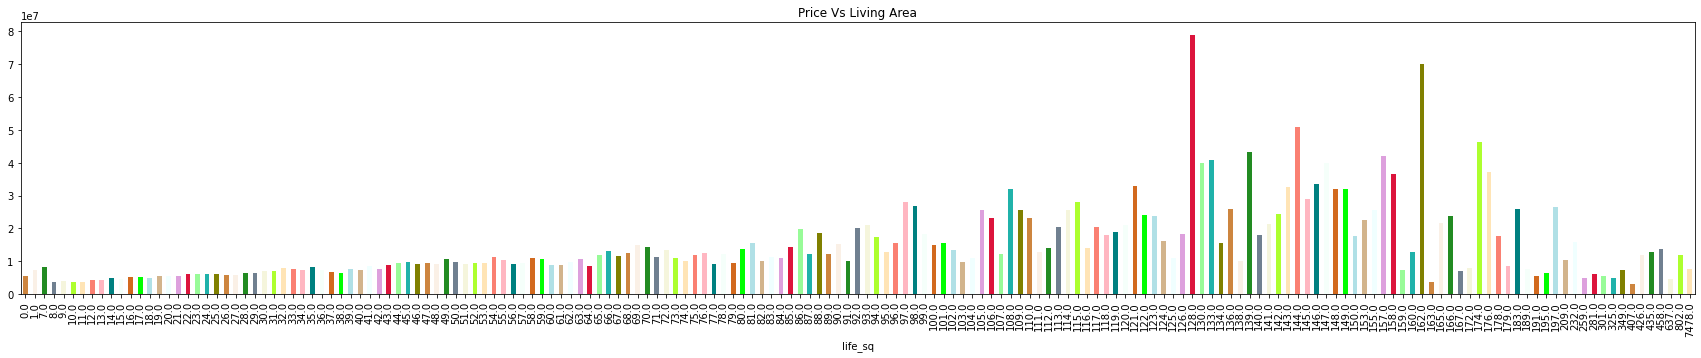

In [107]:
plt.figure(figsize=(30,5))
train_data.price_doc.groupby(train_data.life_sq).mean().plot.bar(color = colour)
plt.title('Price Vs Living Area')
plt.show()

# Both the bar graph of total area and living area are alomost similar hence we can roughly say that with the increase in area price also increases.

# 6. For each district identify the oldest building(year alone). Separate the built year into two sets before 2000 and after 2000. Then identify how the selling prices vary between these two sets.

In [108]:
#build year need to be cleaned and preprocessed before use

bld_yr_replace = {20052009:2005, 0:np.nan, 1:np.nan, 2:np.nan, 3:np.nan, 20:2000, 215:2015, 4965:1965, 71:1971}
train_data['build_year'].replace(to_replace = bld_yr_replace, inplace = True)
train_data['build_year'].tail()

30466   1975.000000
30467   1935.000000
30468           nan
30469   2003.000000
30470   1968.000000
Name: build_year, dtype: float64

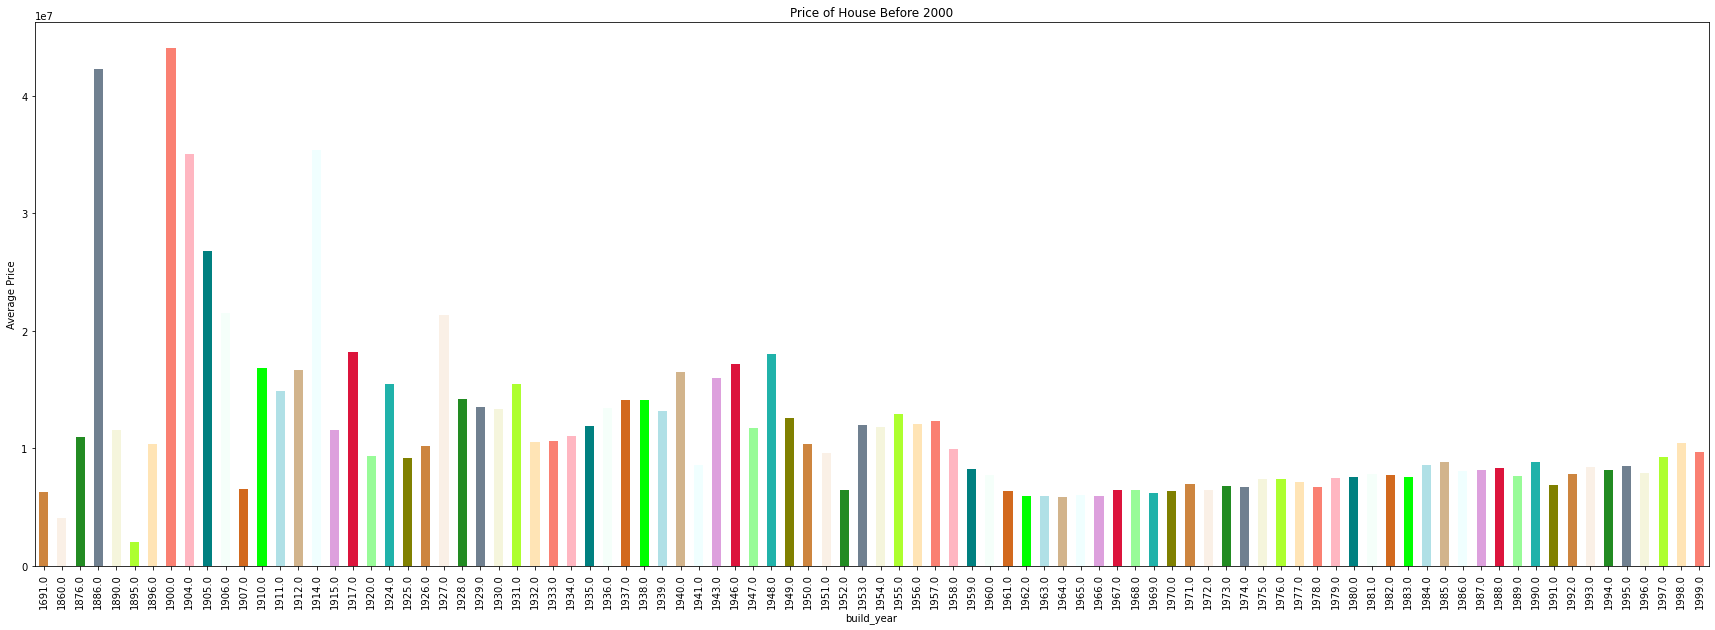

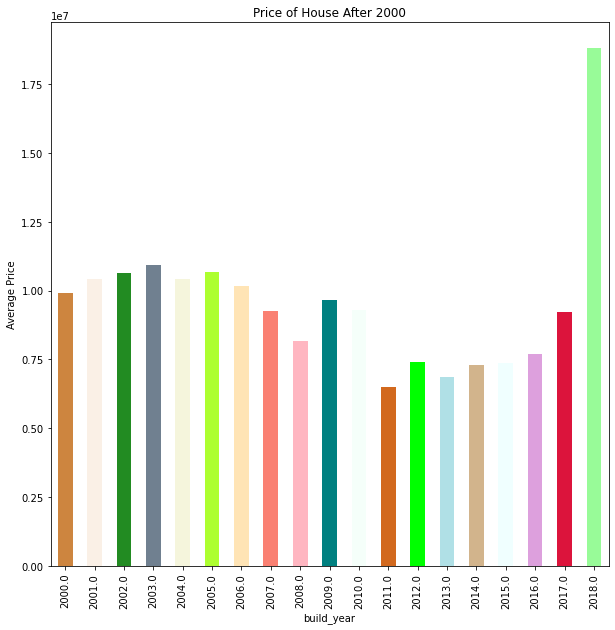

In [109]:
data_before_2000 = train_data[train_data.build_year<2000]
data_after_2000 = train_data[train_data.build_year>=2000]

plt.figure(figsize=(30,10))

data_before_2000.price_doc.groupby(data_before_2000.build_year).mean().plot.bar(color = colour)
plt.ylabel('Average Price')
plt.title('Price of House Before 2000')

plt.show()

plt.figure(figsize=(10,10))
data_after_2000.price_doc.groupby(data_after_2000.build_year).mean().plot.bar(color = colour)
plt.ylabel('Average Price')
plt.title('Price of House After 2000')

plt.show()


# From these two bar Graph we can say if the house is old it may have higher price compare to the new one.

# All the houses build before 2000 have higher price compare to those that build  After 2000.

# If the House before 1950's or 1960's is much costlier. 

# 7. For each product type and for each district calculate the average/median selling price, also identify the districts where people purchase property more than investment and why is it so? That might be because the average price of buildings in that district might be less. Similarly, identify the districts where people invest more than purchase and why is it so? For the both cases display top 5 districts.

In [110]:
count = train_data.price_doc.groupby([train_data.sub_area,train_data.product_type]).count()
output = train_data.groupby([train_data.sub_area,train_data.product_type]).agg({'price_doc':lambda x: x.mean()})
output['Count'] = count
output

price_doc  Count
sub_area          product_type                        
Ajeroport         Investment     9385993.713115    122
                  OwnerOccupier 71249624.000000      1
Akademicheskoe    Investment    10575756.412322    211
Alekseevskoe      Investment     8583913.684211     95
                  OwnerOccupier 16481552.000000      5
...                                         ...    ...
Zamoskvorech'e    OwnerOccupier 33330458.500000      4
Zapadnoe Degunino Investment     6571030.534351    131
                  OwnerOccupier  4719259.114695    279
Zjablikovo        Investment     6644779.527559    127
Zjuzino           Investment     8244375.826255    259

[243 rows x 2 columns]

In [111]:
col = ['OwnerOccupier','Investment','OwnerOccupier_Count','Investment_Count']
index = train_data.sub_area.unique()
index.sort()

df = pd.DataFrame(columns=col,index=index)
#print(df.loc['Ajeroport']['OwnerOccupier'])

for (ind, row) in df.iterrows():
   
   temp = output.loc[ind].index.values
   
   for i in col[:2]:

     if i not in temp:
       df.loc[ind][i] = 0

       if i == 'OwnerOccupier':
         df.loc[ind]['OwnerOccupier_Count'] = 0
       else:
         df.loc[ind]['Investment_Count'] = 0
       
     elif i == 'Investment':
       df.loc[ind][i] = output.loc[ind].loc[i]['price_doc']
       df.loc[ind]['Investment_Count'] = output.loc[ind].loc[i]['Count']
     
     else:
        df.loc[ind][i] = output.loc[ind].loc[i]['price_doc']
        df.loc[ind]['OwnerOccupier_Count'] = output.loc[ind].loc[i]['Count']

df.head(5)

OwnerOccupier      Investment OwnerOccupier_Count  \
Ajeroport      71249624.000000  9385993.713115            1.000000   
Akademicheskoe               0 10575756.412322                   0   
Alekseevskoe   16481552.000000  8583913.684211            5.000000   
Altuf'evskoe                 0  5516201.691176                   0   
Arbat                        0 15794800.000000                   0   

               Investment_Count  
Ajeroport            122.000000  
Akademicheskoe       211.000000  
Alekseevskoe          95.000000  
Altuf'evskoe          68.000000  
Arbat                 15.000000

In [112]:
# Top five district where people invest more in Investment
df.sort_values(by=['Investment_Count'],ascending=False).head()

OwnerOccupier     Investment OwnerOccupier_Count  \
Mar'ino        17209964.000000 7396815.061265            2.000000   
Juzhnoe Butovo  4868716.461538 6871533.757991           13.000000   
Otradnoe       12610000.000000 7112418.224432            1.000000   
Ljublino                     0 6278500.336700                   0   
Bogorodskoe    10942303.555556 6276483.567568            9.000000   

               Investment_Count  
Mar'ino              506.000000  
Juzhnoe Butovo       438.000000  
Otradnoe             352.000000  
Ljublino             297.000000  
Bogorodskoe          296.000000

# People invest more in these district because the Average Selling price for these district are less compared to the OwnerOccupier product type. 

In [113]:
# Top five district where people invest more in Purchase
df.sort_values(by=['OwnerOccupier_Count'],ascending=False).head()

OwnerOccupier     Investment OwnerOccupier_Count  \
Poselenie Sosenskoe     5344147.584129 4627745.000000         1676.000000   
Nekrasovka              5543756.288204 4511886.100840         1492.000000   
Poselenie Vnukovskoe    6309683.264036 3922972.981481         1318.000000   
Poselenie Moskovskij    5731495.586375 4403067.300971          822.000000   
Poselenie Voskresenskoe 5335579.116976 4561597.083333          701.000000   

                        Investment_Count  
Poselenie Sosenskoe           100.000000  
Nekrasovka                    119.000000  
Poselenie Vnukovskoe           54.000000  
Poselenie Moskovskij          103.000000  
Poselenie Voskresenskoe        12.000000

# IF the product_type is OwnerOccupied the average selling price of houses are high.

# People tends to invest more in to those districts where selling of the house is low.

# 8. How does Proportion of area of ​​greenery in the total area in locality impact the selling price.

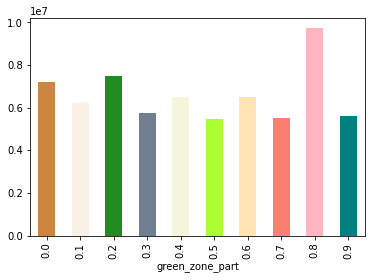

In [114]:
# Lets prepare the data for green_zone_part first we will take round off number then we will group the data then plot bar plot

df = train_data.copy()
df['green_zone_part'] = df.green_zone_part.round(1)

#plt.figure(figsize=(10,10))
df.price_doc.groupby(df.green_zone_part).median().plot.bar(color = colour)
plt.show()

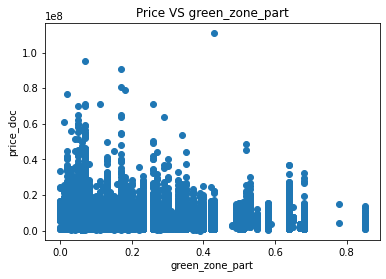

In [115]:
df = train_data.copy()
df['green_zone_part'] = df.green_zone_part.round(2)

plt.scatter(df.green_zone_part,df.price_doc)
plt.xlabel('green_zone_part')
plt.ylabel('price_doc')
plt.title('Price VS green_zone_part')
plt.show()


# We can say that as distance of the house from the green zone increase our price decreases.

# 9. How does the Share of industrial zones in area of ​​the total area impact the selling price.

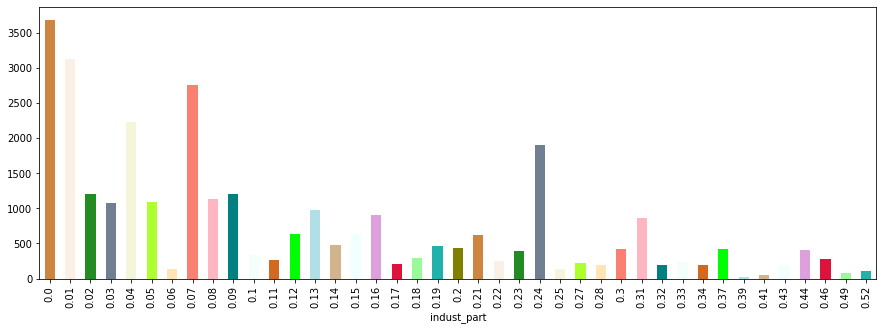

In [116]:
df = train_data.copy()
df['indust_part'] = df.indust_part.round(2)

plt.figure(figsize=(15,5))
df.price_doc.groupby(df.indust_part).count().plot.bar(color = colour)
plt.show()

# If the share of Industrial zone is less the more is the probability people buys house in that area or in other words we can say that Number of Houses are more where there is the less share of industrial zone.

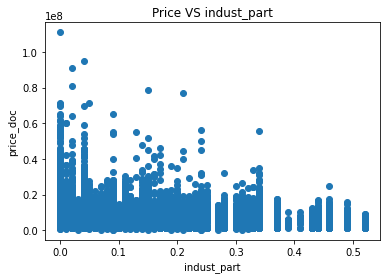

In [117]:
plt.scatter(df.indust_part,df.price_doc)
plt.xlabel('indust_part')
plt.ylabel('price_doc')
plt.title('Price VS indust_part')
plt.show()

# Selling price of Houses are high if the area has less share of industrial zone.

# 10. How does having more schools in the vicinity of a building impact the price of the buildings?Similarly do for healthcare as well as shopping centres.

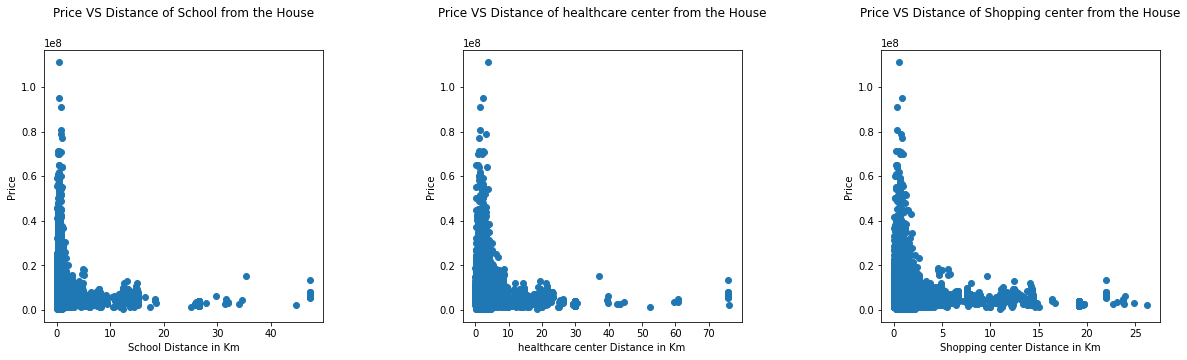

In [118]:

plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,3,1)
plt.scatter(train_data.school_km,train_data.price_doc)
plt.xlabel('School Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of School from the House',x=0.5,y=1.1)


plt.subplot(1,3,2)
plt.scatter(train_data.public_healthcare_km,train_data.price_doc)
plt.xlabel('healthcare center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of healthcare center from the House',x=0.5,y=1.1)

plt.subplot(1,3,3)
plt.scatter(train_data.shopping_centers_km,train_data.price_doc)
plt.xlabel('Shopping center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Shopping center from the House',x=0.5,y=1.1)


plt.show()

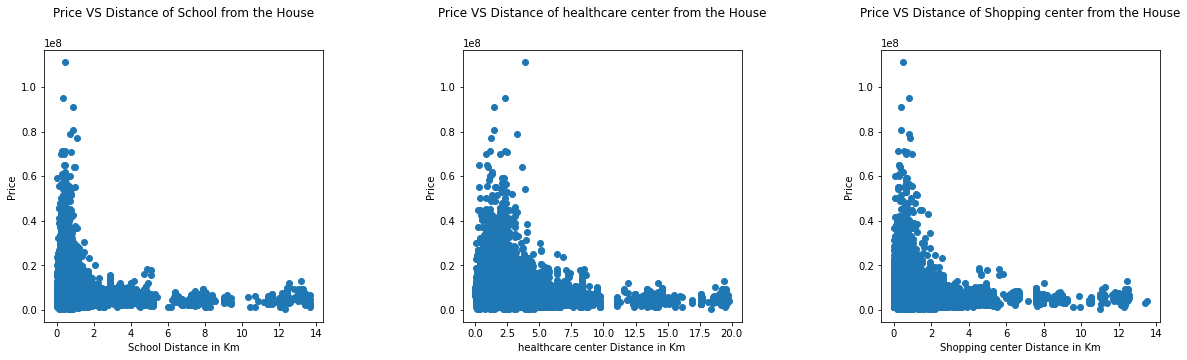

In [119]:
# Removing Outliers

data = train_data[train_data.school_km<20]
data = data[data.public_healthcare_km<20]
data = data[data.shopping_centers_km<15]


plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,3,1)
plt.scatter(data.school_km,data.price_doc)
plt.xlabel('School Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of School from the House',x=0.5,y=1.1)


plt.subplot(1,3,2)
plt.scatter(data.public_healthcare_km,data.price_doc)
plt.xlabel('healthcare center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of healthcare center from the House',x=0.5,y=1.1)

plt.subplot(1,3,3)
plt.scatter(data.shopping_centers_km,data.price_doc)
plt.xlabel('Shopping center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Shopping center from the House',x=0.5,y=1.1)


plt.show()

# In all three graph we can see that price of the house is directly proportioanl to the Distance.

# 11. If the building is situated in a place which has more working class people, then it maybe the case that the building might be having high demand and the price will be high as well. Please check if such a relationship exists in this dataset as well.  


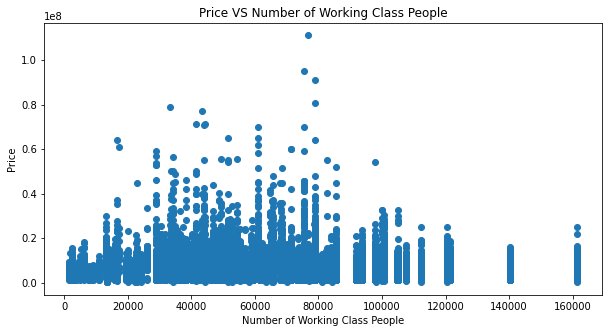

In [120]:
plt.figure(figsize=(10,5))
plt.scatter(train_data.work_all,train_data.price_doc)
plt.xlabel('Number of Working Class People')
plt.ylabel('Price')
plt.title('Price VS Number of Working Class People')
plt.show()

# We can not say that this kind of relationship exists in this dataset beacuse as we can see this graph is not predict anything.


# 12. If a place is near to metro, then does that mean the buildings near are expensive? Similarly do for railway station also.

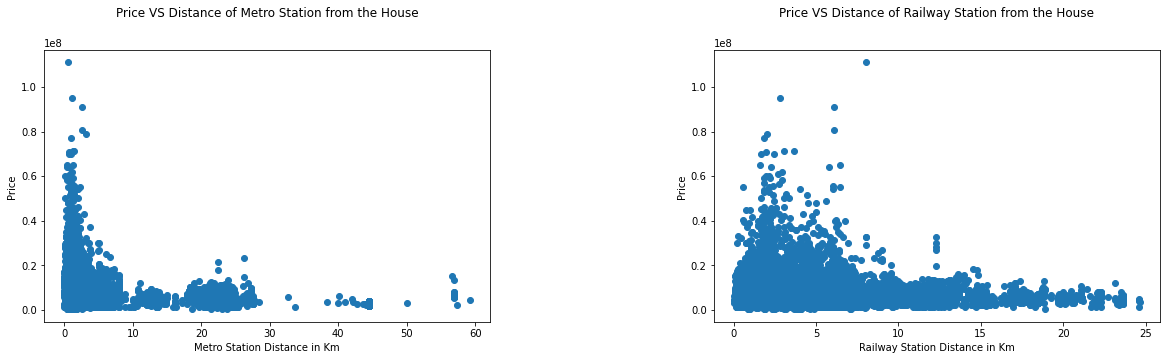

In [121]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.scatter(train_data.metro_km_walk,train_data.price_doc)
plt.xlabel('Metro Station Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Metro Station from the House',x=0.5,y=1.1)


plt.subplot(1,2,2)
plt.scatter(train_data.railroad_station_walk_km,train_data.price_doc)
plt.xlabel('Railway Station Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Railway Station from the House',x=0.5,y=1.1)

plt.show()

# Price of the House is high if the house is nearer to the Metro and Railway Station.

# 13. Generally the building that is nearer to swimming pool are costilier, lets check for this data set if this true.

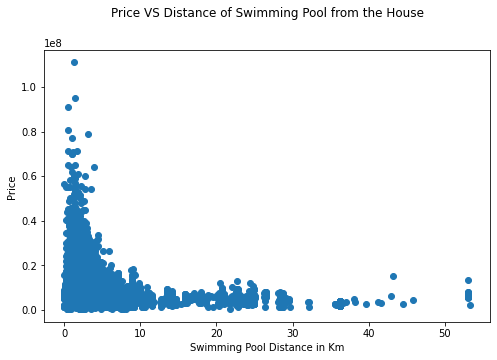

In [122]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.scatter(train_data.swim_pool_km,train_data.price_doc)
plt.xlabel('Swimming Pool Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Swimming Pool from the House',x=0.5,y=1.1)
plt.show()

# Yes the house which is close to the swimming pool is costilier.

# 14. Now Check whether the fitness club has any relationship with the selling price of house.

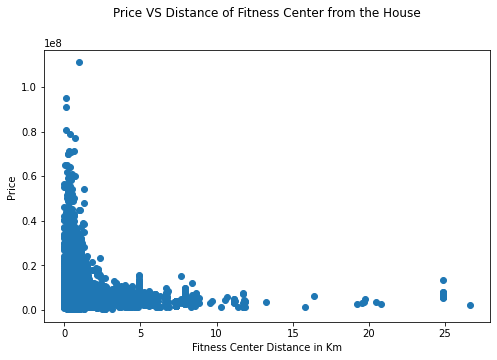

In [123]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.scatter(train_data.fitness_km,train_data.price_doc)
plt.xlabel('Fitness Center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Fitness Center from the House',x=0.5,y=1.1)
plt.show()


# If the House is nearer to the Fitness Club tend to have high selling price.

# 15.Lets see whether Population Count in that area impact the selling price of the house or not?

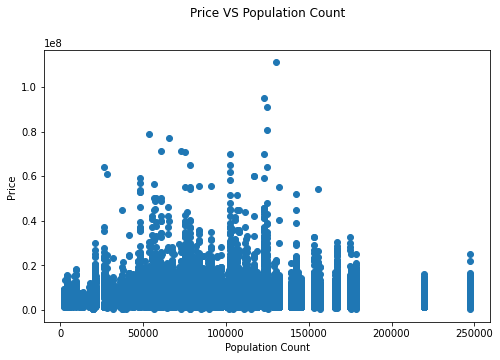

In [124]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.scatter(train_data.raion_popul,train_data.price_doc)
plt.xlabel('Population Count')
plt.ylabel('Price')
plt.title('Price VS Population Count',x=0.5,y=1.1)
plt.show()


# Selling Price of houses are low where population is too dense or too low 

# 16. Ideally there should not be any thermal power station plant near the house.

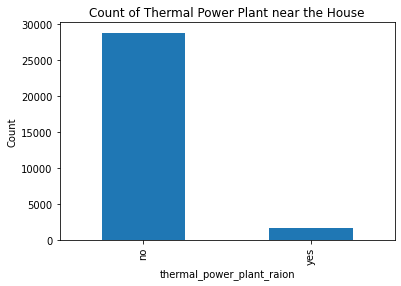

In [125]:
train_data.price_doc.groupby(train_data.thermal_power_plant_raion).count().plot.bar()
plt.title('Count of Thermal Power Plant near the House')
plt.ylabel('Count')
plt.show()

# There are very few houses present near Thermal Power Plant Area

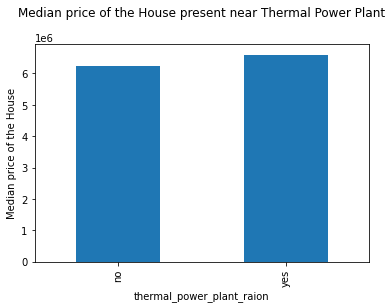

In [126]:
train_data.price_doc.groupby(train_data.thermal_power_plant_raion).median().plot.bar()
plt.title('Median price of the House present near Thermal Power Plant',y=1.1)
plt.ylabel('Median price of the House')
plt.show()

# We can say that houses that are present near thermal power plant are Costilier .

# 17. Selling price of the house is also depends on the state,Lets analyse this feature also.

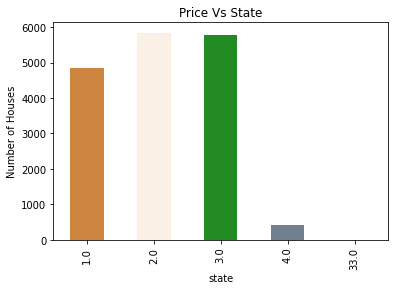

In [127]:
train_data.price_doc.groupby(train_data.state).count().plot.bar(color=colour)
plt.title('Price Vs State')
plt.ylabel('Number of Houses')
plt.show()

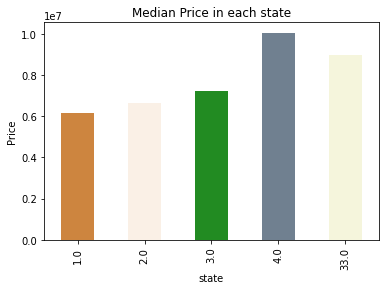

In [128]:
train_data.price_doc.groupby(train_data.state).median().plot.bar(color=colour)
plt.ylabel('Price')
plt.title('Median Price in each state')
plt.show()

# From these two bar graph we can conclude that the house count in the states 1,2, and 3 is more and the median price of the house is highest in the state 4 and 33. Hence people buy more houses in the state 1,2 and 3 because houses in these states are cheaper than the state 4 and 33.

Identify which district highest selling price in respect of year

Identify which district highest lowest price in respect of year

In [129]:


output = train_data.groupby([train_data.build_year.dropna().astype(int),train_data.sub_area]).agg({'price_doc':lambda x: x.mean()})

col = train_data.build_year.dropna().unique()

col = [int(i) for i in col]
col.sort()
index = train_data.sub_area.unique()
index.sort()

df = pd.DataFrame(columns=index,index=col)

for (ind, row) in df.iterrows():
   
   temp = list(output.loc[ind].index)
   
   for i in index:
     if i not in temp:
       df.loc[ind][i] = 0
     else:
       df.loc[ind][i] = output.loc[ind].loc[i].values[0]
   
df = df.astype(int)

df.tail(10)

Ajeroport  Akademicheskoe  Alekseevskoe  Altuf'evskoe  Arbat  \
2009          0               0             0             0      0   
2010          0               0      18125000       1020000      0   
2011   14191417         8000000             0             0      0   
2012          0        16319116       3752800             0      0   
2013          0        17809678             0             0      0   
2014          0        16321500             0             0      0   
2015   71249624               0      22777630             0      0   
2016          0               0             0             0      0   
2017          0               0             0             0      0   
2018          0               0             0             0      0   

      Babushkinskoe  Basmannoe   Begovoe  Beskudnikovskoe  Bibirevo  \
2009              0          0         0         14400000   4000000   
2010              0          0   6800000          8616666         0   
2011              0          0         0          3000000         0   
2012       13830094          0   7000000          4875000         0   
2013        2000000          0  33750000          4250000   4535370   
2014              0          0         0          8050000         0   
2015              0          0         0                0         0   
2016              0          0         0                0         0   
2017              0          0         0                0         0   
2018              0          0         0                0         0   

      Birjulevo Vostochnoe  Birjulevo Zapadnoe  Bogorodskoe  Brateevo  \
2009                     0                   0      9925350         0   
2010                     0                   0      2500000         0   
2011               4593430                   0      5656666         0   
2012               7435578                   0      8427580         0   
2013               5853796             3241825      4400000         0   
2014               7001581                   0      7200000         0   
2015                     0                   0            0         0   
2016                     0                   0            0         0   
2017                     0                   0            0         0   
2018                     0                   0            0         0   

      Butyrskoe  Caricyno  Cheremushki  Chertanovo Central'noe  \
2009    2000000         0     14780000                 1100000   
2010          0         0            0                 3000000   
2011          0         0            0                 8560000   
2012    4333333   3999000            0                       0   
2013          0         0            0                 8025259   
2014          0         0      9300000                13483542   
2015          0         0            0                       0   
2016          0         0            0                       0   
2017          0         0            0                       0   
2018          0         0            0                       0   

      Chertanovo Juzhnoe  Chertanovo Severnoe  Danilovskoe  Dmitrovskoe  \
2009                   0                    0            0      8900000   
2010            17000000              8882990            0      9800000   
2011            14173785                    0      4400000            0   
2012                   0                    0            0      1500000   
2013             7355158             10168215            0            0   
2014             7877381              8634788      3098965            0   
2015             7375615              7644018     20137915            0   
2016                   0                    0     13939825            0   
2017                   0                    0     18800000            0   
2018                   0                    0     18800000            0   

       Donskoe  Dorogomilovo  Filevskij Park  Fili Davydkovo  Gagarinskoe  \
2009         0     

In [130]:
# Year in which the distrct having highest selling price 
district = [] #{District:Year in which its average price was high}
price_max = [] # Average highest price of the district in that year

for col in index:
  price_max.append(df[col].max())
  district.append({col:df[col].idxmax()})


print(price_max)
print(district)

[71249624, 29900000, 22777630, 11800000, 61072000, 13830094, 35000000, 33750000, 14400000, 9285714, 10250000, 8500000, 12225000, 8683333, 14500000, 14250000, 25716666, 17700000, 17000000, 20400000, 20137915, 9800000, 24500000, 28300000, 25000000, 44000000, 36500000, 19000000, 12400000, 65000000, 22500000, 56500000, 19000000, 15250000, 19400142, 64000000, 15990000, 26014650, 13986537, 13595000, 16575000, 19250000, 10400000, 32500000, 14700000, 8450000, 27010000, 22080290, 12500000, 36500000, 24166666, 26700000, 18500000, 18125000, 17750000, 10625000, 15750000, 36000000, 20000000, 40000000, 12200000, 17360000, 7850000, 50000000, 14000000, 21000000, 3600000, 10708333, 55000000, 14500000, 13200000, 15800000, 7506800, 16000000, 10290000, 12000000, 9600000, 45000000, 20150000, 11300000, 21000000, 14816000, 18700000, 10350000, 20800000, 28420000, 6200000, 4000000, 15190446, 1000000, 7250000, 3747989, 4925000, 3480000, 7088057, 10200000, 3067893, 7500000, 9825000, 6492096, 2851000, 8040000, 17

In [131]:
price_max = np.array(price_max)
max = np.argmax(price_max)

print("Districe having highest price is : "+str(district[max])+" and the highest selling price of the house was "+str(price_max[max]))

Districe having highest price is : {'Presnenskoe': 1927} and the highest selling price of the house was 95122496


In [132]:
# Year in which the distrct having lowest selling price 
district = [] #{District:Year in which its average price was high}
price_min = [] # Average highest price of the district in that year

for col in index:
  price_min.append(df[col].min())
  district.append({col:df[col].idxmin()})


print(price_min)
print(district)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[{'Ajeroport': 1691}, {'Akademicheskoe': 1691}, {'Alekseevskoe': 1691}, {"Altuf'evskoe": 1691}, {'Arbat': 1691}, {'Babushkinskoe': 1691}, {'Basmannoe': 1691}, {'Begovoe': 1691}, {'Beskudnikovskoe': 1691}, {'Bibirevo': 1691}, {'Birjulevo Vostochnoe': 1691}, {'Birjulevo Zapadnoe': 1691}, {'Bogorodskoe': 1691}, {'Brateevo': 1691}, {'Butyrskoe': 1691}, {'Caricyno': 1691}, {'Cheremushki': 1691}, {"Chertanovo Central'noe": 1691}, {'Chertanovo Juzhnoe': 1691}, {'Chertanovo Severnoe': 1691}, {'Danilovskoe': 1691}, {'Dmitrovskoe': 1691}, {'Donskoe': 1691}, {'Dorog

# Year in which the distrct having highest selling price is 1927 and the District is Presnenskoe and has selling price of 95122496.

# All districts reports 0 selling price in the year 1691.


 # Now lets see how the columns are correlated with each other

(30471, 295)


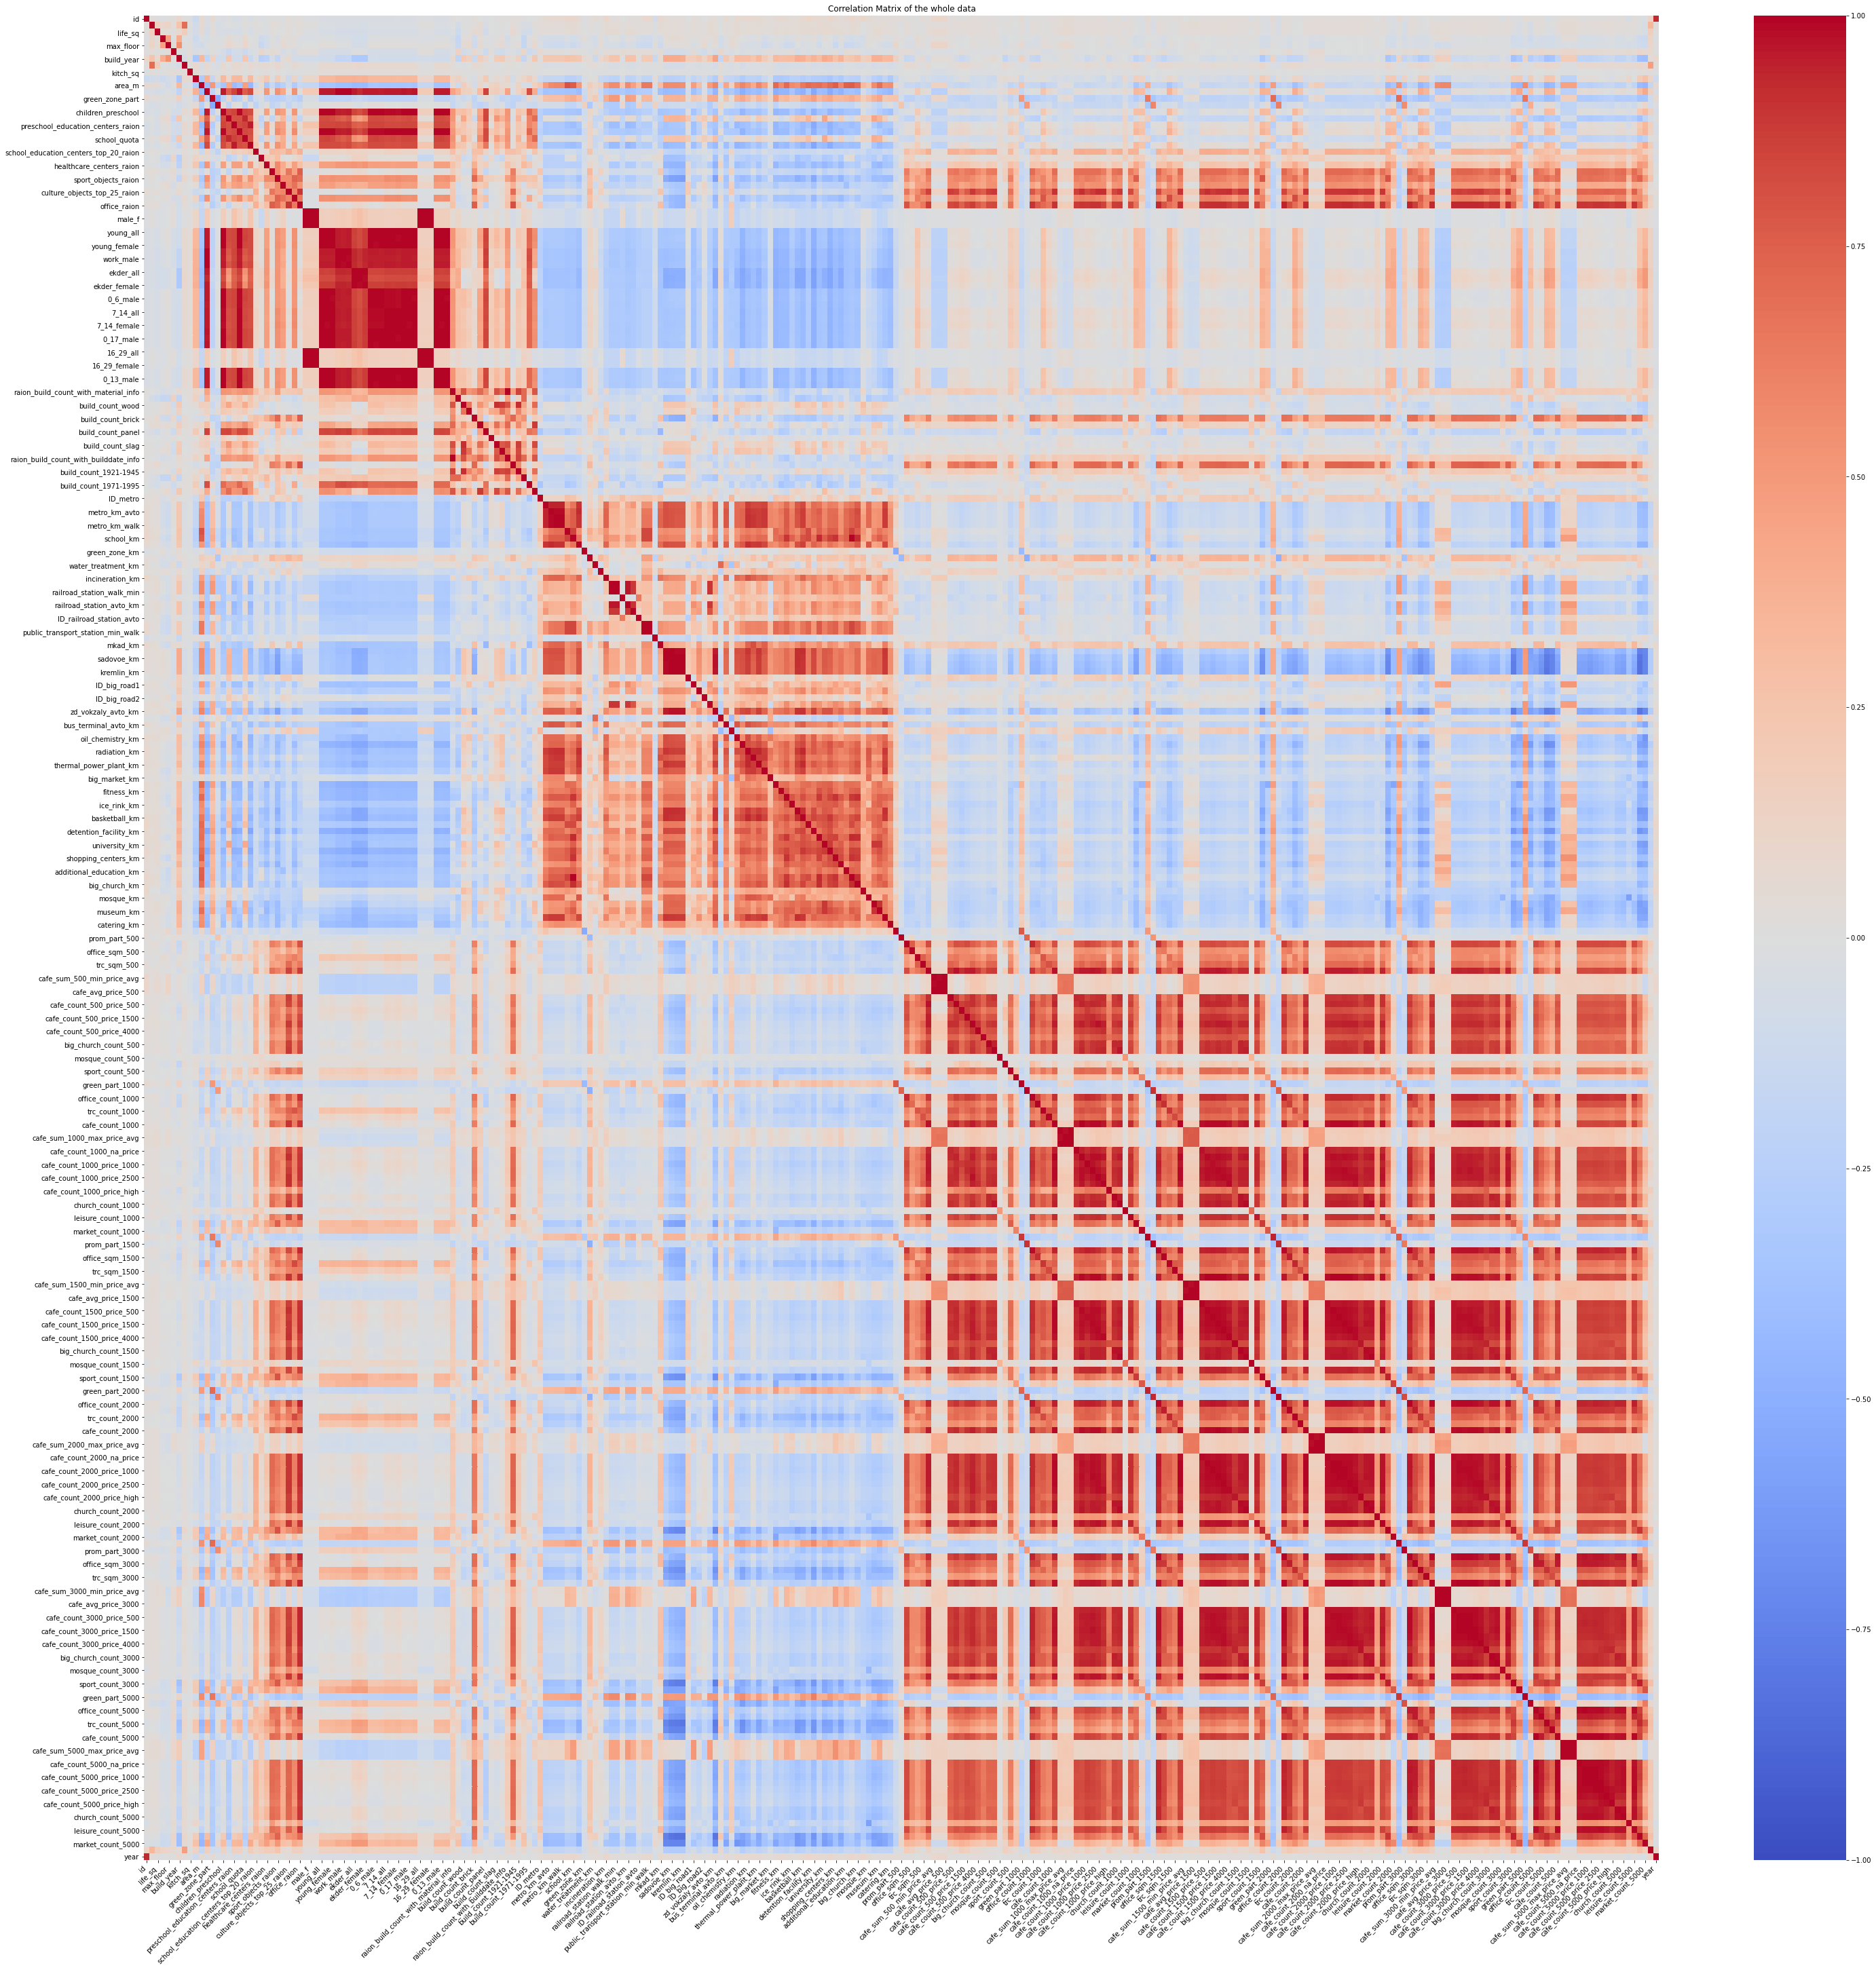

In [133]:
print(train_data.shape)

corr = train_data.corr()
plt.figure(figsize=(50, 50))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap= 'coolwarm'
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix of the whole data')
plt.show()

# We cannot visulaize the data in one go we will divide our data based on correlation value with respect to price.



# 1. Lets set cor_target in this step 0.25 we will analyse all the features which has correlation values of 0.25 or more with respect to the price_doc.

In [134]:
#Correlation with output variable 
cor_target = abs(corr["price_doc"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.25]
relevant_features

full_sq               0.341840
num_room              0.476337
sport_objects_raion   0.252794
ttk_km                0.272620
sadovoe_km            0.283622
bulvar_ring_km        0.279158
kremlin_km            0.279249
zd_vokzaly_avto_km    0.284069
nuclear_reactor_km    0.257946
sport_count_1500      0.258376
sport_count_2000      0.278056
sport_count_3000      0.290651
office_sqm_5000       0.269977
trc_count_5000        0.289371
trc_sqm_5000          0.268072
sport_count_5000      0.294864
price_doc             1.000000
Name: price_doc, dtype: float64

# These are the features that are highly correlated with the output variable we can only keep these features and drop all of them, we will also check if these features are correlated with each other in that case we will keep only one feature.

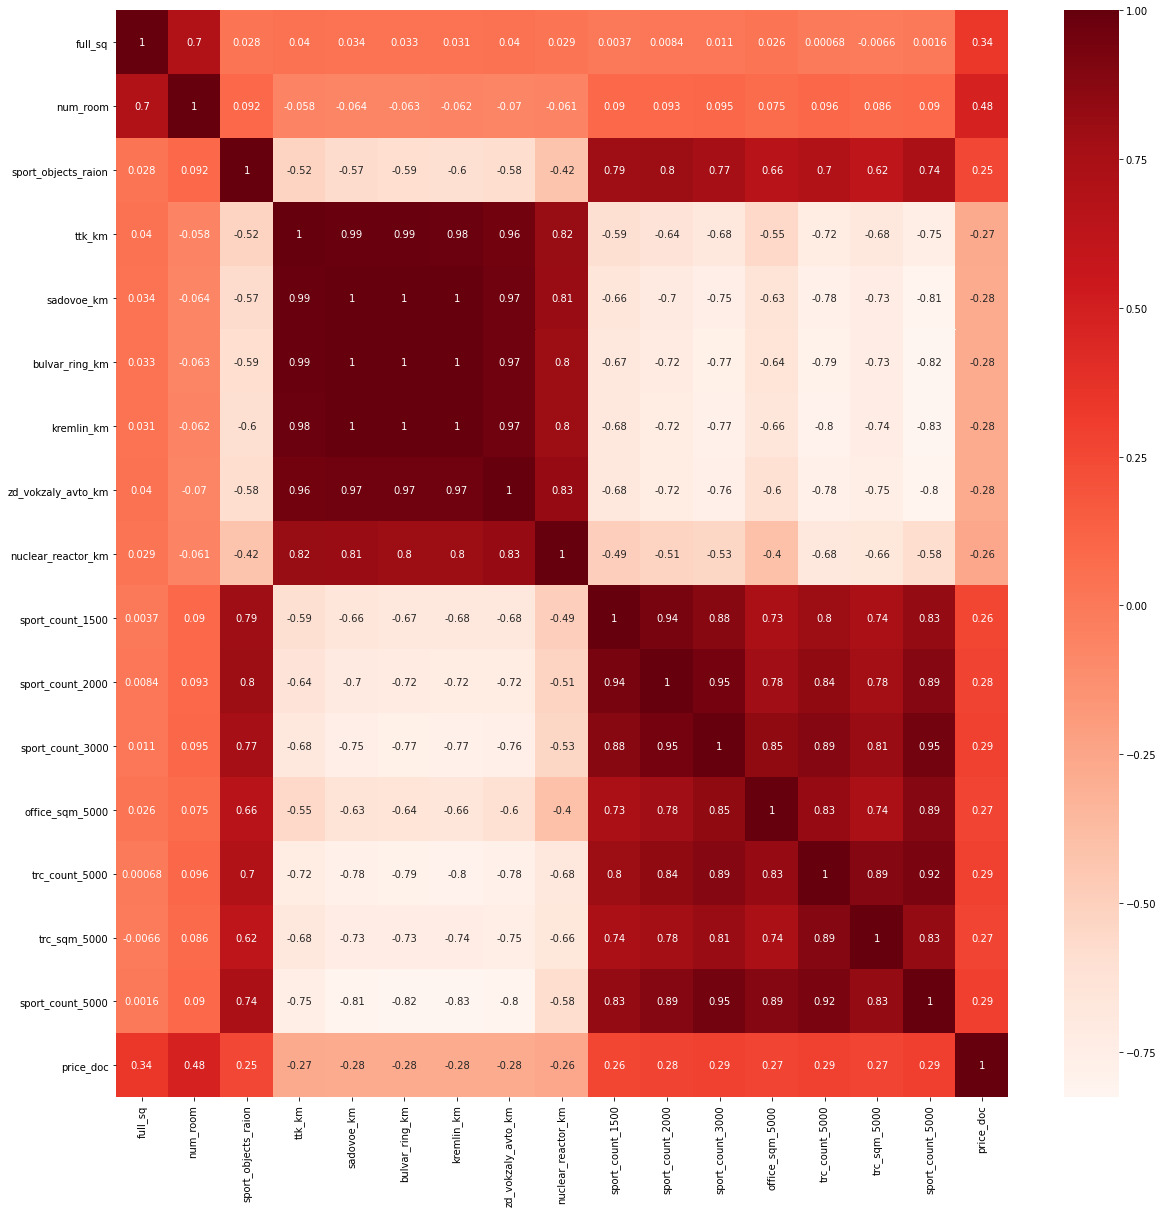

In [135]:
#Using Pearson Correlation

plt.figure(figsize=(20,20))
cor = train_data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h3>Take away from this Graph: </h3><br>

1. 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'zd_vokzaly_avto_km',nuclear_reactor_km these features are highly correlated with each other hence we can keep anyone feature among all and discard the rest.<br>

2. sport_count_1500, sport_count_2000, sport_count_3000, office_sqm_5000,trc_count_5000, trc_sqm_5000, sport_count_5000      these features are highly correlated with each other hence we can keep anyone feature among all and discard the rest.<br>
    


# 2. Now lets analyse cor_target in this step between 0.25 to 0.20 i.e features which has correlation values between (0.20,0.25) with respect to price_doc.

In [136]:
#Correlation with output variable
cor_target = abs(corr["price_doc"])

#Selecting highly correlated features
relevant_features = cor_target[(cor_target<0.25) & (cor_target>=0.20)]
relevant_features

thermal_power_plant_km       0.210417
swim_pool_km                 0.211798
stadium_km                   0.236924
basketball_km                0.223462
detention_facility_km        0.223061
university_km                0.218552
workplaces_km                0.209302
office_km                    0.223429
theater_km                   0.216025
exhibition_km                0.207877
catering_km                  0.210793
office_sqm_2000              0.216495
office_sqm_3000              0.226780
trc_count_3000               0.242068
trc_sqm_3000                 0.225533
office_count_5000            0.219249
cafe_count_5000              0.231546
cafe_count_5000_na_price     0.230055
cafe_count_5000_price_500    0.226952
cafe_count_5000_price_1000   0.240464
cafe_count_5000_price_1500   0.232612
cafe_count_5000_price_2500   0.225566
cafe_count_5000_price_4000   0.210354
cafe_count_5000_price_high   0.214327
church_count_5000            0.213275
leisure_count_5000           0.200448
Name: price_

In [137]:
print(len(relevant_features))

26


In [138]:
print(relevant_features.index)

Index(['thermal_power_plant_km', 'swim_pool_km', 'stadium_km', 'basketball_km',
       'detention_facility_km', 'university_km', 'workplaces_km', 'office_km',
       'theater_km', 'exhibition_km', 'catering_km', 'office_sqm_2000',
       'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000',
       'office_count_5000', 'cafe_count_5000', 'cafe_count_5000_na_price',
       'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'church_count_5000', 'leisure_count_5000'],
      dtype='object')


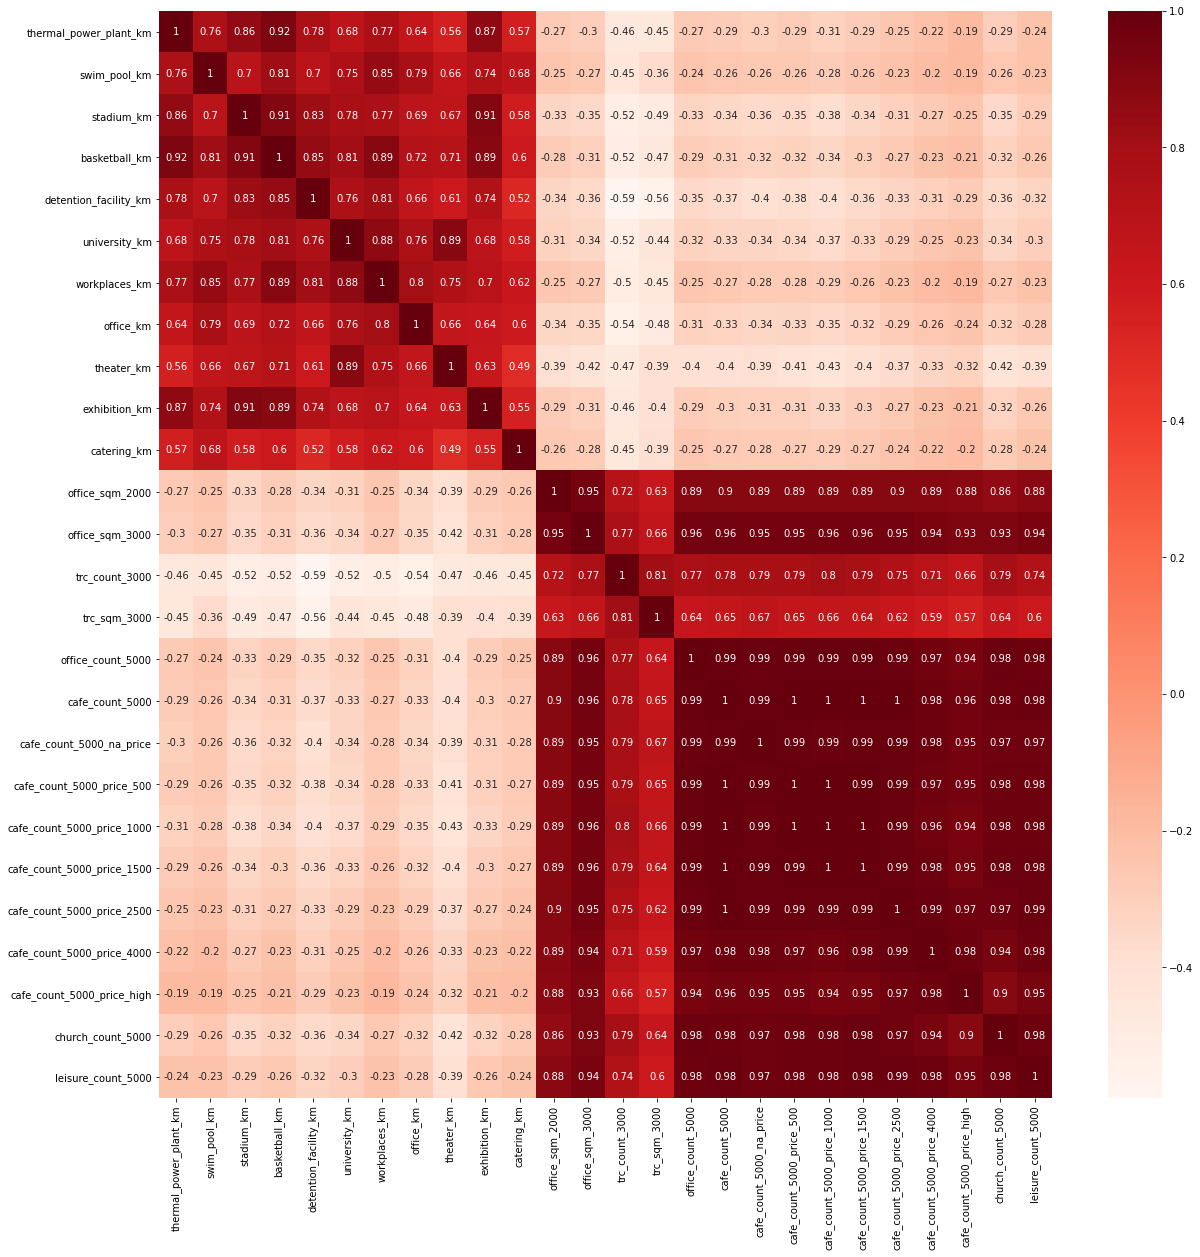

In [139]:
#Using Pearson Correlation

plt.figure(figsize=(20,20))
cor = train_data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h3>Take away from this Graph : </h3><br>

1. 'office_sqm_2000','office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'office_count_5000', 'cafe_count_5000', 'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500','cafe_count_5000_price_4000', 'cafe_count_5000_price_high','church_count_5000', 'leisure_count_5000' these features are highly correlated with each other hence we can keep anyone feature among all and discard the rest.<br>

2. 'thermal_power_plant_km', 'swim_pool_km', 'stadium_km', 'basketball_km','detention_facility_km', 'university_km', 'workplaces_km', 'office_km','theater_km', 'exhibition_km' these features are highly correlated with each other hence we can keep anyone feature among all and discard the rest.<br>
    


# 3. Now lets analyse cor_target in this step between 0.20 to 0.15 i.e features which has correlation values between (0.15,0.20) with respect to price_doc.

In [140]:
#Correlation with output variable
cor_target = abs(corr["price_doc"])

#Selecting highly correlated features
relevant_features = cor_target[(cor_target>=0.15) & (cor_target<0.20)]
relevant_features

life_sq                             0.165606
area_m                              0.166981
raion_popul                         0.151587
preschool_education_centers_raion   0.159418
school_education_centers_raion      0.193636
healthcare_centers_raion            0.190006
university_top_20_raion             0.165827
shopping_centers_raion              0.150825
ekder_all                           0.173264
ekder_male                          0.182465
ekder_female                        0.168338
build_count_brick                   0.168595
metro_min_avto                      0.192180
metro_km_avto                       0.179412
metro_min_walk                      0.182786
metro_km_walk                       0.182786
park_km                             0.186584
big_road2_km                        0.160778
bus_terminal_avto_km                0.160176
radiation_km                        0.192863
power_transmission_line_km          0.155534
ts_km                               0.161826
market_sho

In [141]:
print(len(relevant_features))
print(relevant_features.index)

53
Index(['life_sq', 'area_m', 'raion_popul', 'preschool_education_centers_raion',
       'school_education_centers_raion', 'healthcare_centers_raion',
       'university_top_20_raion', 'shopping_centers_raion', 'ekder_all',
       'ekder_male', 'ekder_female', 'build_count_brick', 'metro_min_avto',
       'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'park_km',
       'big_road2_km', 'bus_terminal_avto_km', 'radiation_km',
       'power_transmission_line_km', 'ts_km', 'market_shop_km', 'fitness_km',
       'ice_rink_km', 'hospice_morgue_km', 'public_healthcare_km',
       'shopping_centers_km', 'big_church_km', 'mosque_km', 'museum_km',
       'office_count_500', 'cafe_count_500_price_1000', 'leisure_count_500',
       'office_count_1000', 'office_sqm_1000', 'cafe_count_1000_price_1000',
       'cafe_count_1000_price_high', 'sport_count_1000', 'office_count_1500',
       'office_sqm_1500', 'trc_count_2000', 'office_count_3000',
       'cafe_count_3000', 'cafe_count_3000_na_price

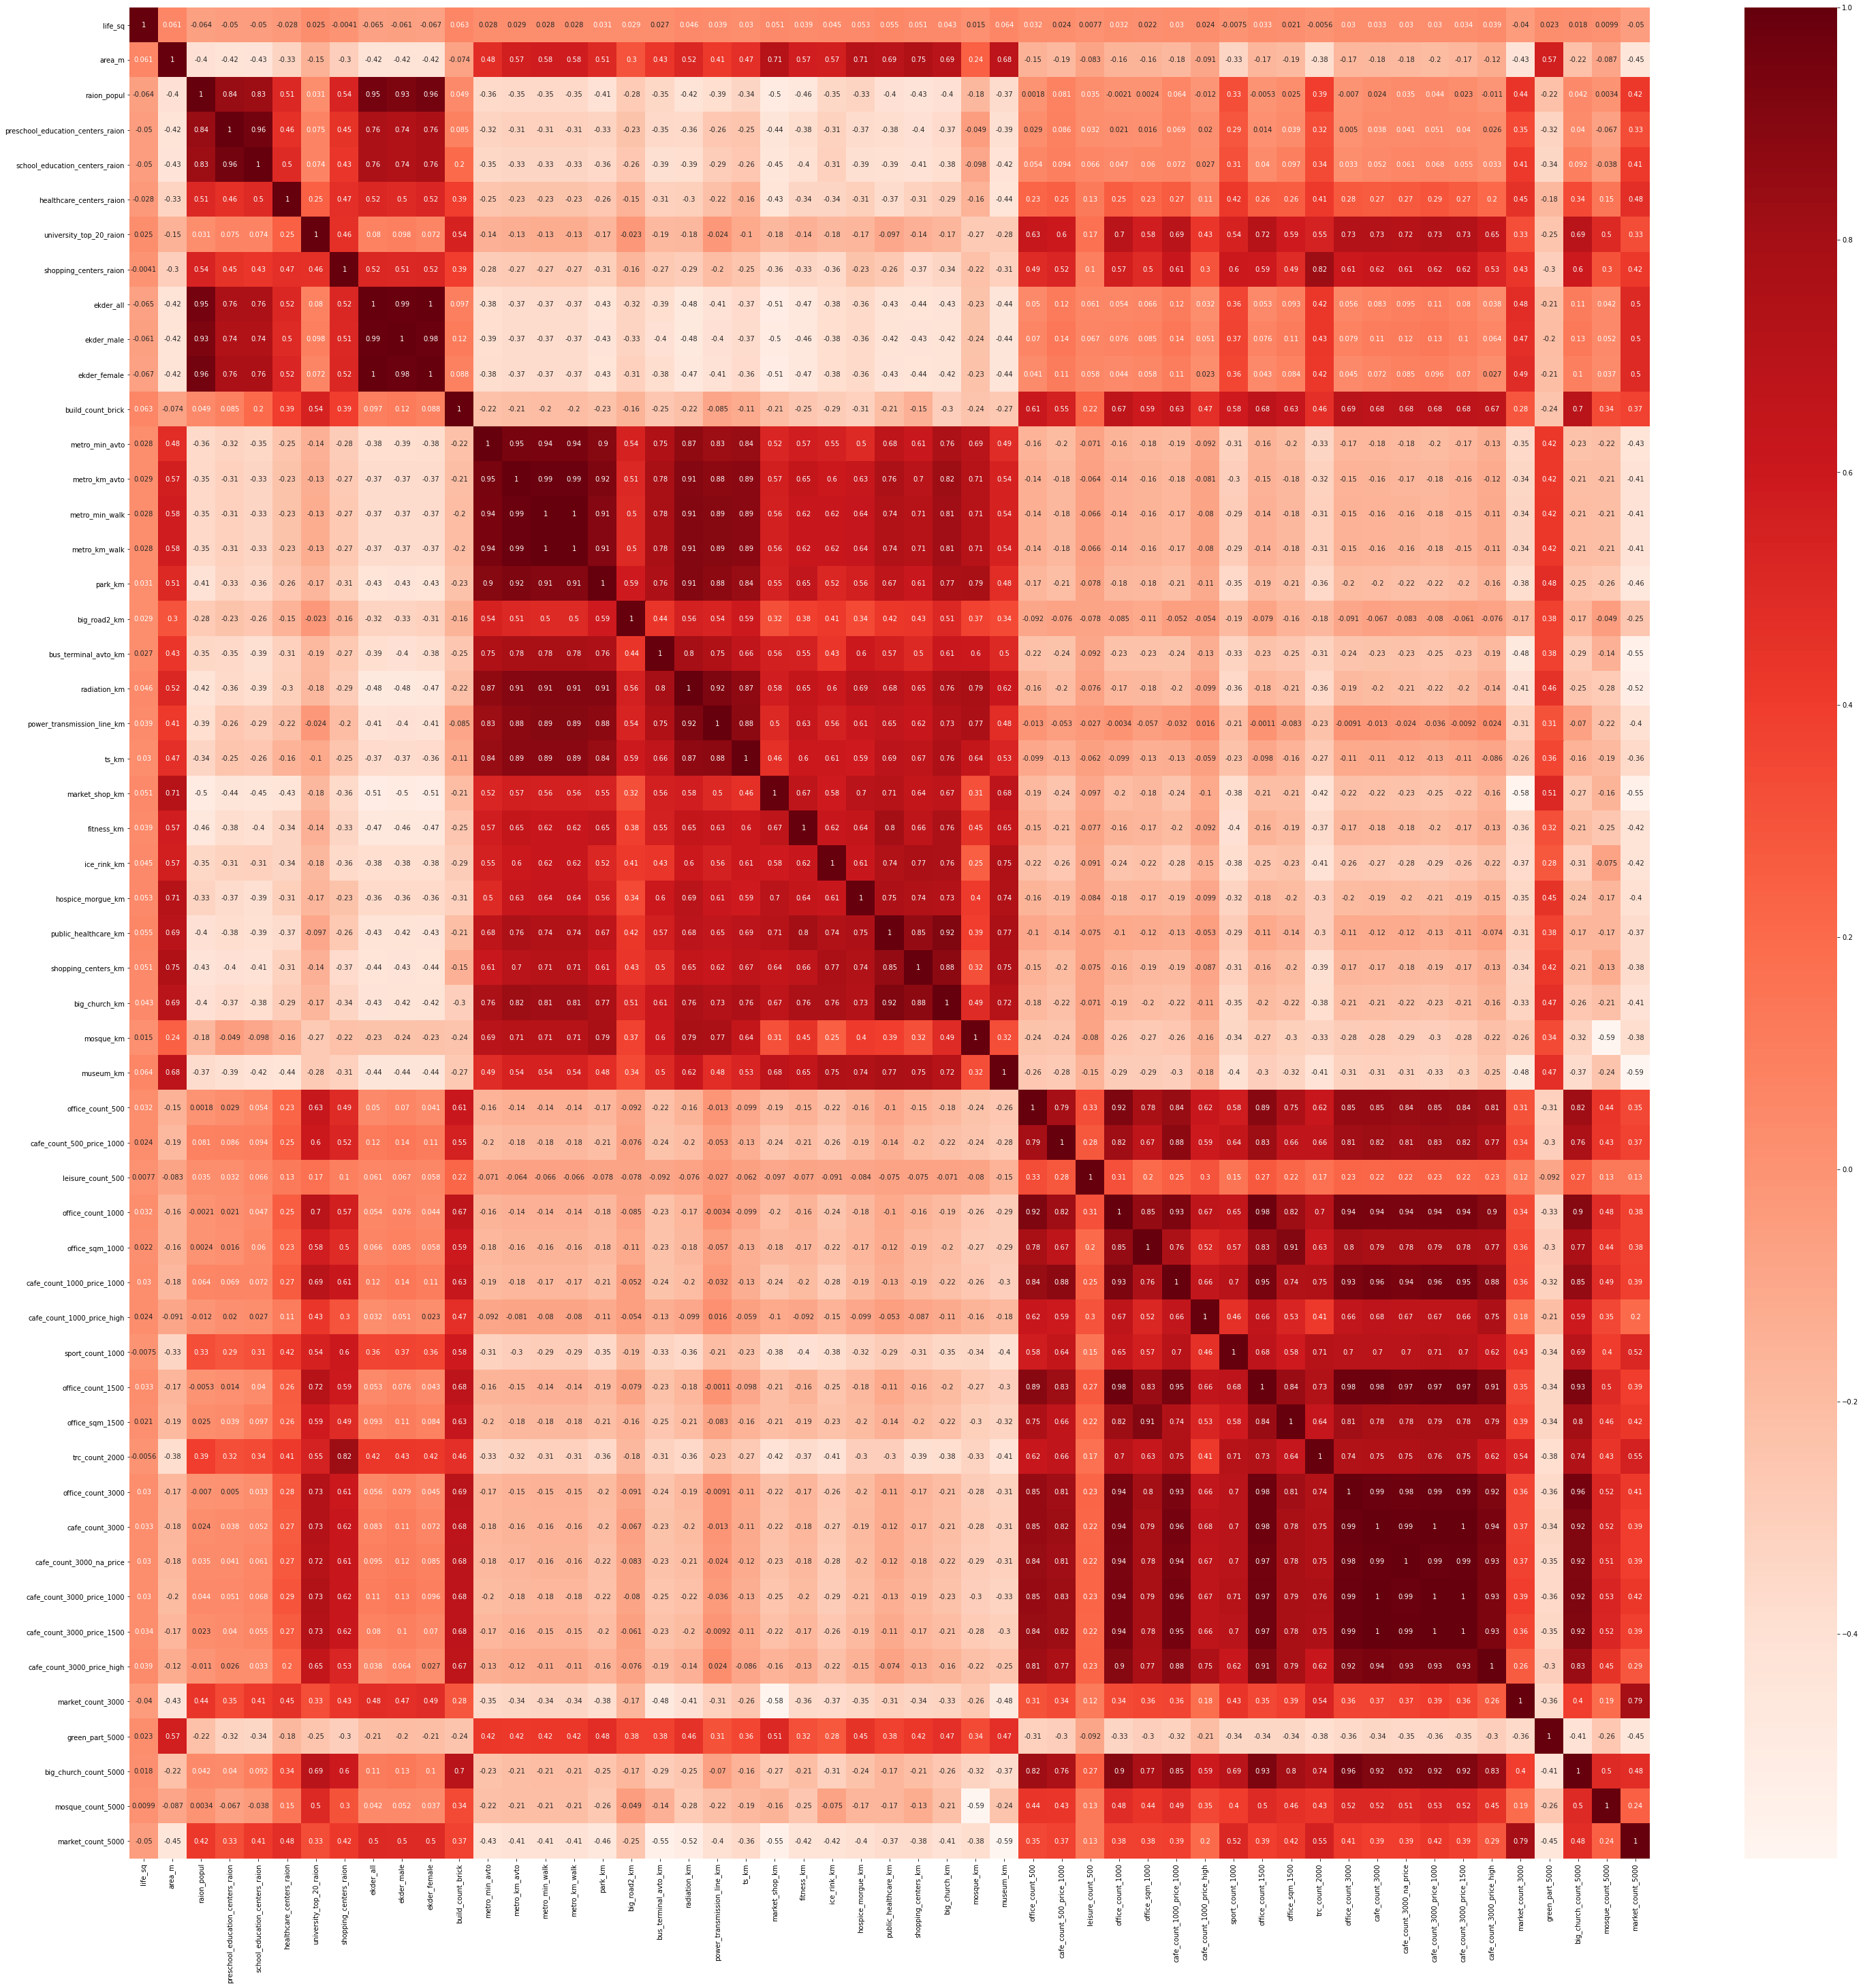

In [142]:
#Using Pearson Correlation

plt.figure(figsize=(50,50))
cor = train_data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h3>Take away from this Graph : </h3><br>

1. 'office_sqm_2000','office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'office_count_5000', 'cafe_count_5000', 'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500','cafe_count_5000_price_4000', 'cafe_count_5000_price_high','church_count_5000', 'leisure_count_5000' these features are highly correlated with each other hence we can keep anyone feature among all and discard the rest.<br>

2. 'thermal_power_plant_km', 'swim_pool_km', 'stadium_km', 'basketball_km','detention_facility_km', 'university_km', 'workplaces_km', 'office_km','theater_km', 'exhibition_km' these features are highly correlated with each other hence we can keep anyone feature among all and discard the rest.<br>
    


# 4. Now lets analyse cor_target in this step between 0.15 to 0.10 i.e features which has correlation values between (0.10,0.15) with respect to price_doc.

In [143]:
#Correlation with output variable
cor_target = abs(corr["price_doc"])

#Selecting highly correlated features
relevant_features = cor_target[(cor_target>=0.10) & (cor_target<0.15)]
relevant_features

id                           0.121203
floor                        0.117447
state                        0.121303
children_preschool           0.133957
children_school              0.138860
                               ...   
cafe_count_3000_price_4000   0.127223
big_church_count_3000        0.131873
church_count_3000            0.135589
leisure_count_3000           0.110387
year                         0.120194
Name: price_doc, Length: 81, dtype: float64

In [144]:
print(len(relevant_features))
print(relevant_features.index)

81
Index(['id', 'floor', 'state', 'children_preschool', 'children_school',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'office_raion', 'young_all', 'young_male', 'young_female', 'work_all',
       'work_male', 'work_female', '0_6_all', '0_6_male', '0_6_female',
       '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male',
       '0_17_female', '0_13_all', '0_13_male', '0_13_female',
       'build_count_monolith', 'kindergarten_km', 'school_km',
       'railroad_station_walk_km', 'railroad_station_walk_min',
       'railroad_station_avto_km', 'railroad_station_avto_min',
       'public_transport_station_km', 'public_transport_station_min_walk',
       'big_road1_km', 'oil_chemistry_km', 'additional_education_km',
       'preschool_km', 'church_synagogue_km', 'office_sqm_500',
       'cafe_count_500', 'cafe_count_500_price_1500', 'cafe_count_1000',
       'cafe_count_1000_na_price', 'cafe_count_1000_price_1500',
       'trc_count_1500', 'cafe_c

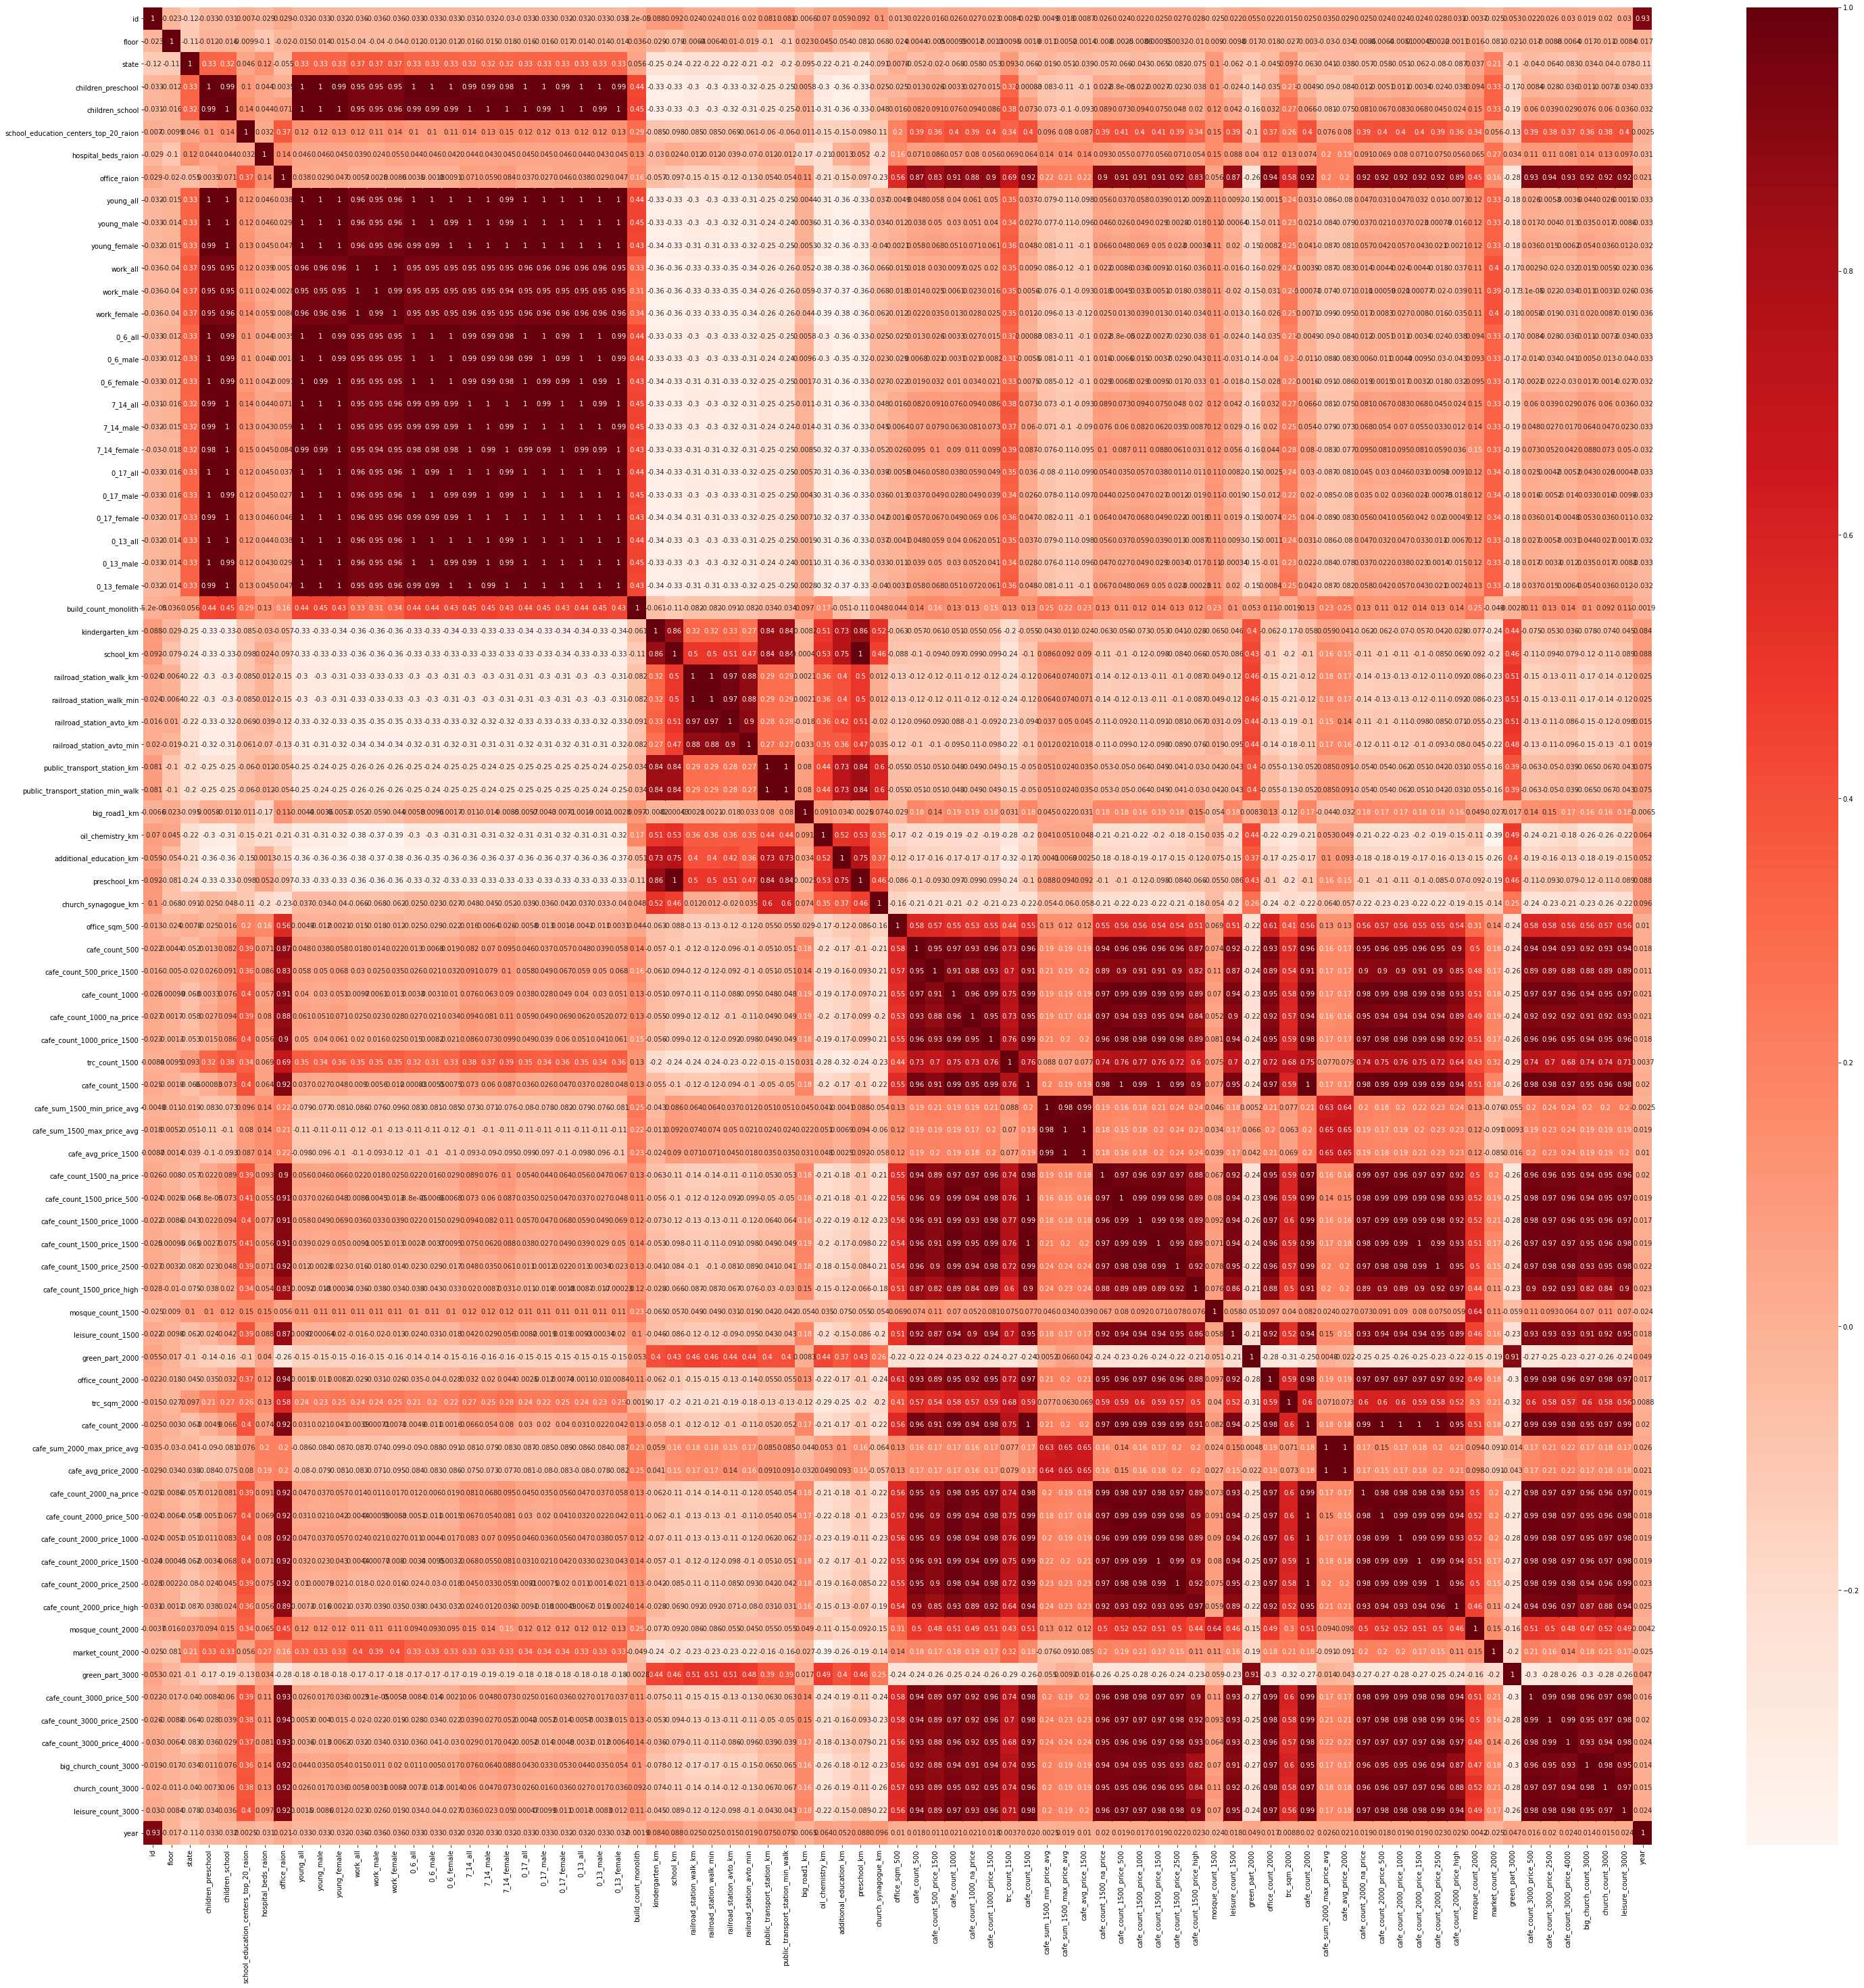

In [145]:
#Using Pearson Correlation

plt.figure(figsize=(50,50))
cor = train_data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h3>Take away from this Graph : </h3><br>

1. 'children_preschool', 'children_school'.<br>

2. 'young_all', 'young_male', 'young_female', 'work_all','work_male', 'work_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male','0_17_female', '0_13_all', '0_13_male', '0_13_female'

3. 'railroad_station_walk_km', 'railroad_station_walk_min','railroad_station_avto_km', 'railroad_station_avto_min'.
       
4. 'public_transport_station_km', 'public_transport_station_min_walk'

5. 'cafe_count_500', 'cafe_count_500_price_1500', 'cafe_count_1000','cafe_count_1000_na_price', 'cafe_count_1000_price_1500','trc_count_1500', 'cafe_count_1500'.

6.  'cafe_sum_1500_min_price_avg','cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500'

7. 'cafe_count_1500_na_price', 'cafe_count_1500_price_500','cafe_count_1500_price_1000', 'cafe_count_1500_price_1500',
    'cafe_count_1500_price_2500', 'cafe_count_1500_price_high'.
    
8. 'cafe_count_3000_price_500', 'cafe_count_3000_price_2500','cafe_count_3000_price_4000', 'big_church_count_3000',
    church_count_3000', 'leisure_count_3000'.

# Since full_sq and num_room columns are highly correlated with the response variable with the correlation value of 0.34 and 0.47 respectively.

# From these Correlation Matrixes we can easily figure out what feature need to be dropped. This is the one method of feature selection but we can explore other options also Lets do the Feature Selection and Feature Extraction by Select from Model Method. We will Use Random Forest Classifier to select the features.

# Selecting features using Random Forest 

# 1. Preparing Data For the Model

# Droping all the columns having missing values more than 10%

In [146]:
train_data.drop(columns=['hospital_beds_raion', 'build_year', 'state', 'cafe_avg_price_500',
       'cafe_sum_500_max_price_avg', 'cafe_sum_500_min_price_avg', 'max_floor',
       'material', 'num_room', 'kitch_sq', 'preschool_quota', 'school_quota',
       'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
       'cafe_avg_price_1000', 'life_sq', 'build_count_frame',
       'build_count_1971-1995', 'build_count_block',
       'raion_build_count_with_material_info', 'build_count_after_1995',
       'build_count_brick', 'build_count_wood', 'build_count_mix',
       'build_count_1921-1945', 'build_count_panel', 'build_count_foam',
       'build_count_slag', 'raion_build_count_with_builddate_info',
       'build_count_monolith', 'build_count_before_1920',
       'build_count_1946-1970', 'cafe_sum_1500_min_price_avg',
       'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500','year_month','day_of_week','year'],inplace=True)

# Fill all the remaining missing values by median

In [147]:
 train_data['cafe_sum_2000_max_price_avg'].median()

1156.25

In [148]:
values = {'cafe_sum_2000_max_price_avg': train_data['cafe_sum_2000_max_price_avg'].median(),
          'cafe_avg_price_2000': train_data['cafe_avg_price_2000'].median(),
          'cafe_sum_2000_min_price_avg': train_data['cafe_sum_2000_min_price_avg'].median(),
          'cafe_avg_price_3000': train_data['cafe_avg_price_3000'].median(),
           'cafe_sum_3000_max_price_avg': train_data['cafe_sum_3000_max_price_avg'].median(),
           'cafe_sum_3000_min_price_avg': train_data['cafe_sum_3000_min_price_avg'].median(),
           'cafe_avg_price_5000': train_data['cafe_avg_price_5000'].median(),
           'cafe_sum_5000_max_price_avg': train_data['cafe_sum_5000_max_price_avg'].median(),
           'cafe_sum_5000_min_price_avg': train_data['cafe_sum_5000_min_price_avg'].median(),
           'prom_part_5000': train_data['prom_part_5000'].median(),
           'floor': train_data['floor'].median(),
           'metro_min_walk': train_data['metro_min_walk'].median(),
           'railroad_station_walk_km': train_data['railroad_station_walk_km'].median(),
          'railroad_station_walk_min': train_data['railroad_station_walk_min'].median(),
          'ID_railroad_station_walk': train_data['ID_railroad_station_walk'].median(),
          'metro_km_walk': train_data['metro_km_walk'].median()
         }

          
train_data.fillna(value=values,inplace=True)

# Removing Outliers by Quartile method

In [149]:
print("0th quantile of price_doc : ", (np.quantile(train_data['price_doc'], 0))/100000)
print("2nd quantile of price_doc : ", (np.quantile(train_data['price_doc'], 0.02))/100000)
print("5th quantile of price_doc : ", np.quantile(train_data['price_doc'], .05)/100000) 
print("10th quantile of price_doc : ", np.quantile(train_data['price_doc'], .10)/100000)
print("15th quantile of price_doc : ", np.quantile(train_data['price_doc'], .15)/100000)
print("Q1 quantile of price_doc : ", np.quantile(train_data['price_doc'], .25)/100000)
print("Q2 quantile of price_doc : ", np.quantile(train_data['price_doc'], .50)/100000)
print("Q3 quantile of price_doc : ", np.quantile(train_data['price_doc'], .75)/100000)
print("90th quantile of price_doc : ", np.quantile(train_data['price_doc'], .90)/100000)
print("95th quantile of price_doc : ", np.quantile(train_data['price_doc'], .95)/100000)
print("99th quantile of price_doc : ", (np.quantile(train_data['price_doc'], 0.99))/100000)
print("100th quantile of price_doc : ", np.quantile(train_data['price_doc'], 1)/100000)

0th quantile of price_doc :  1.0
2nd quantile of price_doc :  10.0
5th quantile of price_doc :  20.0
10th quantile of price_doc :  30.0
15th quantile of price_doc :  38.1717
Q1 quantile of price_doc :  47.40002
Q2 quantile of price_doc :  62.74411
Q3 quantile of price_doc :  83.0
90th quantile of price_doc :  118.0
95th quantile of price_doc :  145.0
99th quantile of price_doc :  245.3207539999992
100th quantile of price_doc :  1111.11112


# From the above we can clearly see that there are outliers hence we will only consider the value of price_doc between 1000000 and 24532075

In [150]:
filter =   (train_data['price_doc']>1000000) & (train_data['price_doc'] <24532075)
filter_data = train_data[filter]

print(filter_data.shape)

(29186, 257)


In [151]:
# Get  columns whose data type is object i.e. string
filteredColumns = filter_data.dtypes[ (filter_data.dtypes == np.object)]

# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)

print("Number of columns with data type object are : ",len(listOfColumnNames))
print("\n",listOfColumnNames)

Number of columns with data type object are :  15

 ['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology']


In [152]:
print(train_data.product_type.value_counts())
print('*'*254)
print(train_data.sub_area.value_counts())
print('*'*254)
print(train_data.culture_objects_top_25.value_counts())
print('*'*254)
print(train_data.thermal_power_plant_raion.value_counts())
print('*'*254)
print(train_data.incineration_raion.value_counts())
print('*'*254)
print(train_data.oil_chemistry_raion.value_counts())
print('*'*254)
print(train_data.radiation_raion.value_counts())
print('*'*254)
print(train_data.railroad_terminal_raion.value_counts())
print('*'*254)
print(train_data.big_market_raion.value_counts())
print('*'*254)
print(train_data.nuclear_reactor_raion.value_counts())
print('*'*254)
print(train_data.detention_facility_raion.value_counts())
print('*'*254)
print(train_data.water_1line.value_counts())
print('*'*254)
print(train_data.big_road1_1line.value_counts())
print('*'*254)
print(train_data.big_road1_1line.value_counts())
print('*'*254)
print(train_data.ecology.value_counts())

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64
**************************************************************************************************************************************************************************************************************************************************************
Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64
***************************************************************************************************************************************************************************************************

# Since all the dtype is categorical data we will use label enconder to convert this in to numeric

In [153]:
Y = filter_data['price_doc']
filter_data.drop(columns = ['price_doc','timestamp','id'],inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
X_train, X_test, y_train, y_test = train_test_split(filter_data,Y,test_size=0.2,random_state =42)

In [155]:
#Using Label encoder

for i in tqdm(listOfColumnNames):
 
    le = preprocessing.LabelEncoder() 
    le.fit(X_train[i])

    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])


  0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 15/15 [00:00<00:00, 144.13it/s]


# min - max Normalization of data other than categorical data

In [156]:
# Get  columns whose data type is not object i.e. string
filteredColumns = filter_data.dtypes[ (filter_data.dtypes != np.object)]

# list of columns whose data type is not object i.e. string
listOfColumnNames = list(filteredColumns.index)

print("Number of columns with data type int or float are : ",len(listOfColumnNames))
#print("\n",listOfColumnNames)

Number of columns with data type int or float are :  239


In [157]:
for i in tqdm(listOfColumnNames):
    
    minimum = X_train[i].min()
    maximum = X_train[i].max()
    
    X_train[i] = (X_train[i] - minimum)/(maximum - minimum)
    X_test[i] =  (X_test[i] - minimum)/(maximum - minimum)
    
    

  0%|          | 0/239 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 239/239 [00:01<00:00, 205.10it/s]


In [158]:
X_train.head()

full_sq    floor  product_type  sub_area   area_m  raion_popul  \
415   0.007135 0.142857             0        45 0.062758     0.284110   
26829 0.007510 0.155844             1       123 0.045308     0.454637   
28556 0.008449 0.051948             0       110 0.006942     0.142722   
4483  0.014833 0.116883             1       133 0.025618     0.297363   
6874  0.005633 0.012987             0        65 0.051482     0.718295   

       green_zone_part  indust_part  children_preschool  \
415           0.026514     0.303236            0.388072   
26829         0.096270     0.711195            0.428654   
28556         0.170451     0.403308            0.113345   
4483          0.074691     0.000150            0.213251   
6874          0.226573     0.133661            0.677866   

       preschool_education_centers_raion  children_school  \
415                             0.307692         0.294105   
26829                           0.384615         0.364631   
28556                           0.076923         0.117896   
4483                            0.307692         0.329368   
6874                            0.692308         0.713825   

       school_education_centers_raion  school_education_centers_top_20_raion  \
415                          0.357143                               0.000000   
26829                        0.357143                               0.000000   
28556                        0.142857                               0.000000   
4483                         0.285714                               0.500000   
6874                         0.714286                               0.000000   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
415                    0.166667                 0.000000             0.137931   
26829                  0.333333                 0.000000             0.137931   
28556                  0.500000                 0.333333             0.275862   
4483                   0.500000                 0.666667             1.000000   
6874                   0.166667                 0.000000             0.586207   

       additional_education_raion  culture_objects_top_25  \
415                      0.125000                       0   
26829                    0.187500                       0   
28556                    0.312500                       0   
4483                     1.000000                       1   
6874                     0.375000                       0   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
415                        0.000000                0.000000      0.000000   
26829                      0.000000                0.217391      0.007092   
28556                      0.000000                0.000000      0.014184   
4483                       1.000000                1.000000      1.000000   
6874                       0.000000                0.478261      0.028369   

       thermal_power_plant_raion  incineration_raion  oil_chemistry_raion  \
415                            0                   1                    0   
26829                          0                   0                    0   
28556                          0                   0                    0   
4483                           0                   0                    0   
6874                           0                   0                    0   

       radiation_raion  railroad_terminal_raion  big_market_raion  \
415                  1                        0                 0   
26829                0                        0                 0   
28556                0                        0                 0   
4483                 1                        1                 0   
6874                 0                        0                 0   

       nuclear_reactor_raion  detention_facility_raion  full_all   male_f  \
415                        0                         0  0.058501 0.060223   
26829           

# 2 . Applying the Classifier on the Data

In [159]:
sel = SelectFromModel(RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=5))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=5,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50, n_jobs=-1,
                                                 oob_score=False,
                                                 rando

# 3. Selecting the Features from the Model

In [160]:
print('Number of important features')
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

Number of important features


87

In [161]:
for name, importance in zip(X_train.columns, sel.estimator_.feature_importances_):
  print(name, "=", importance)

full_sq = 0.09842230181705093
floor = 0.02470165700716066
product_type = 0.0637696811711332
sub_area = 0.0026982561304433866
area_m = 0.0019259870456239106
raion_popul = 0.008840786128412102
green_zone_part = 0.002872896220519609
indust_part = 0.0018686975255235536
children_preschool = 0.009322847943419943
preschool_education_centers_raion = 0.0018059364192691337
children_school = 0.0009705264208012623
school_education_centers_raion = 0.0012499602525851278
school_education_centers_top_20_raion = 0.0
healthcare_centers_raion = 0.0
university_top_20_raion = 0.0
sport_objects_raion = 0.0
additional_education_raion = 0.0
culture_objects_top_25 = 0.0
culture_objects_top_25_raion = 0.0
shopping_centers_raion = 0.0016950236315166356
office_raion = 0.0
thermal_power_plant_raion = 0.0
incineration_raion = 0.0025433883281966783
oil_chemistry_raion = 0.0
radiation_raion = 0.0
railroad_terminal_raion = 0.0
big_market_raion = 0.0
nuclear_reactor_raion = 0.0
detention_facility_raion = 0.0
full_all =

# Top 30 Features

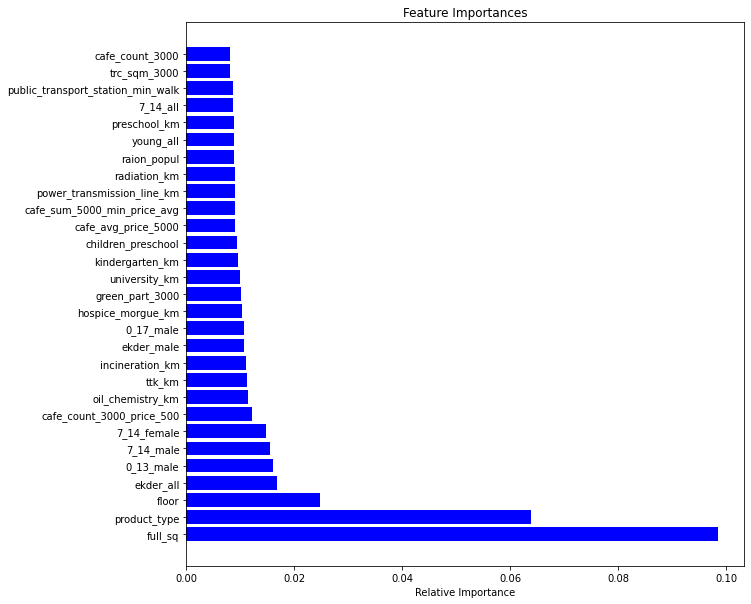

In [162]:
features = X_train.columns.values

importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[:-30:-1]

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Let do the Bivariate analysis with these top 30 features

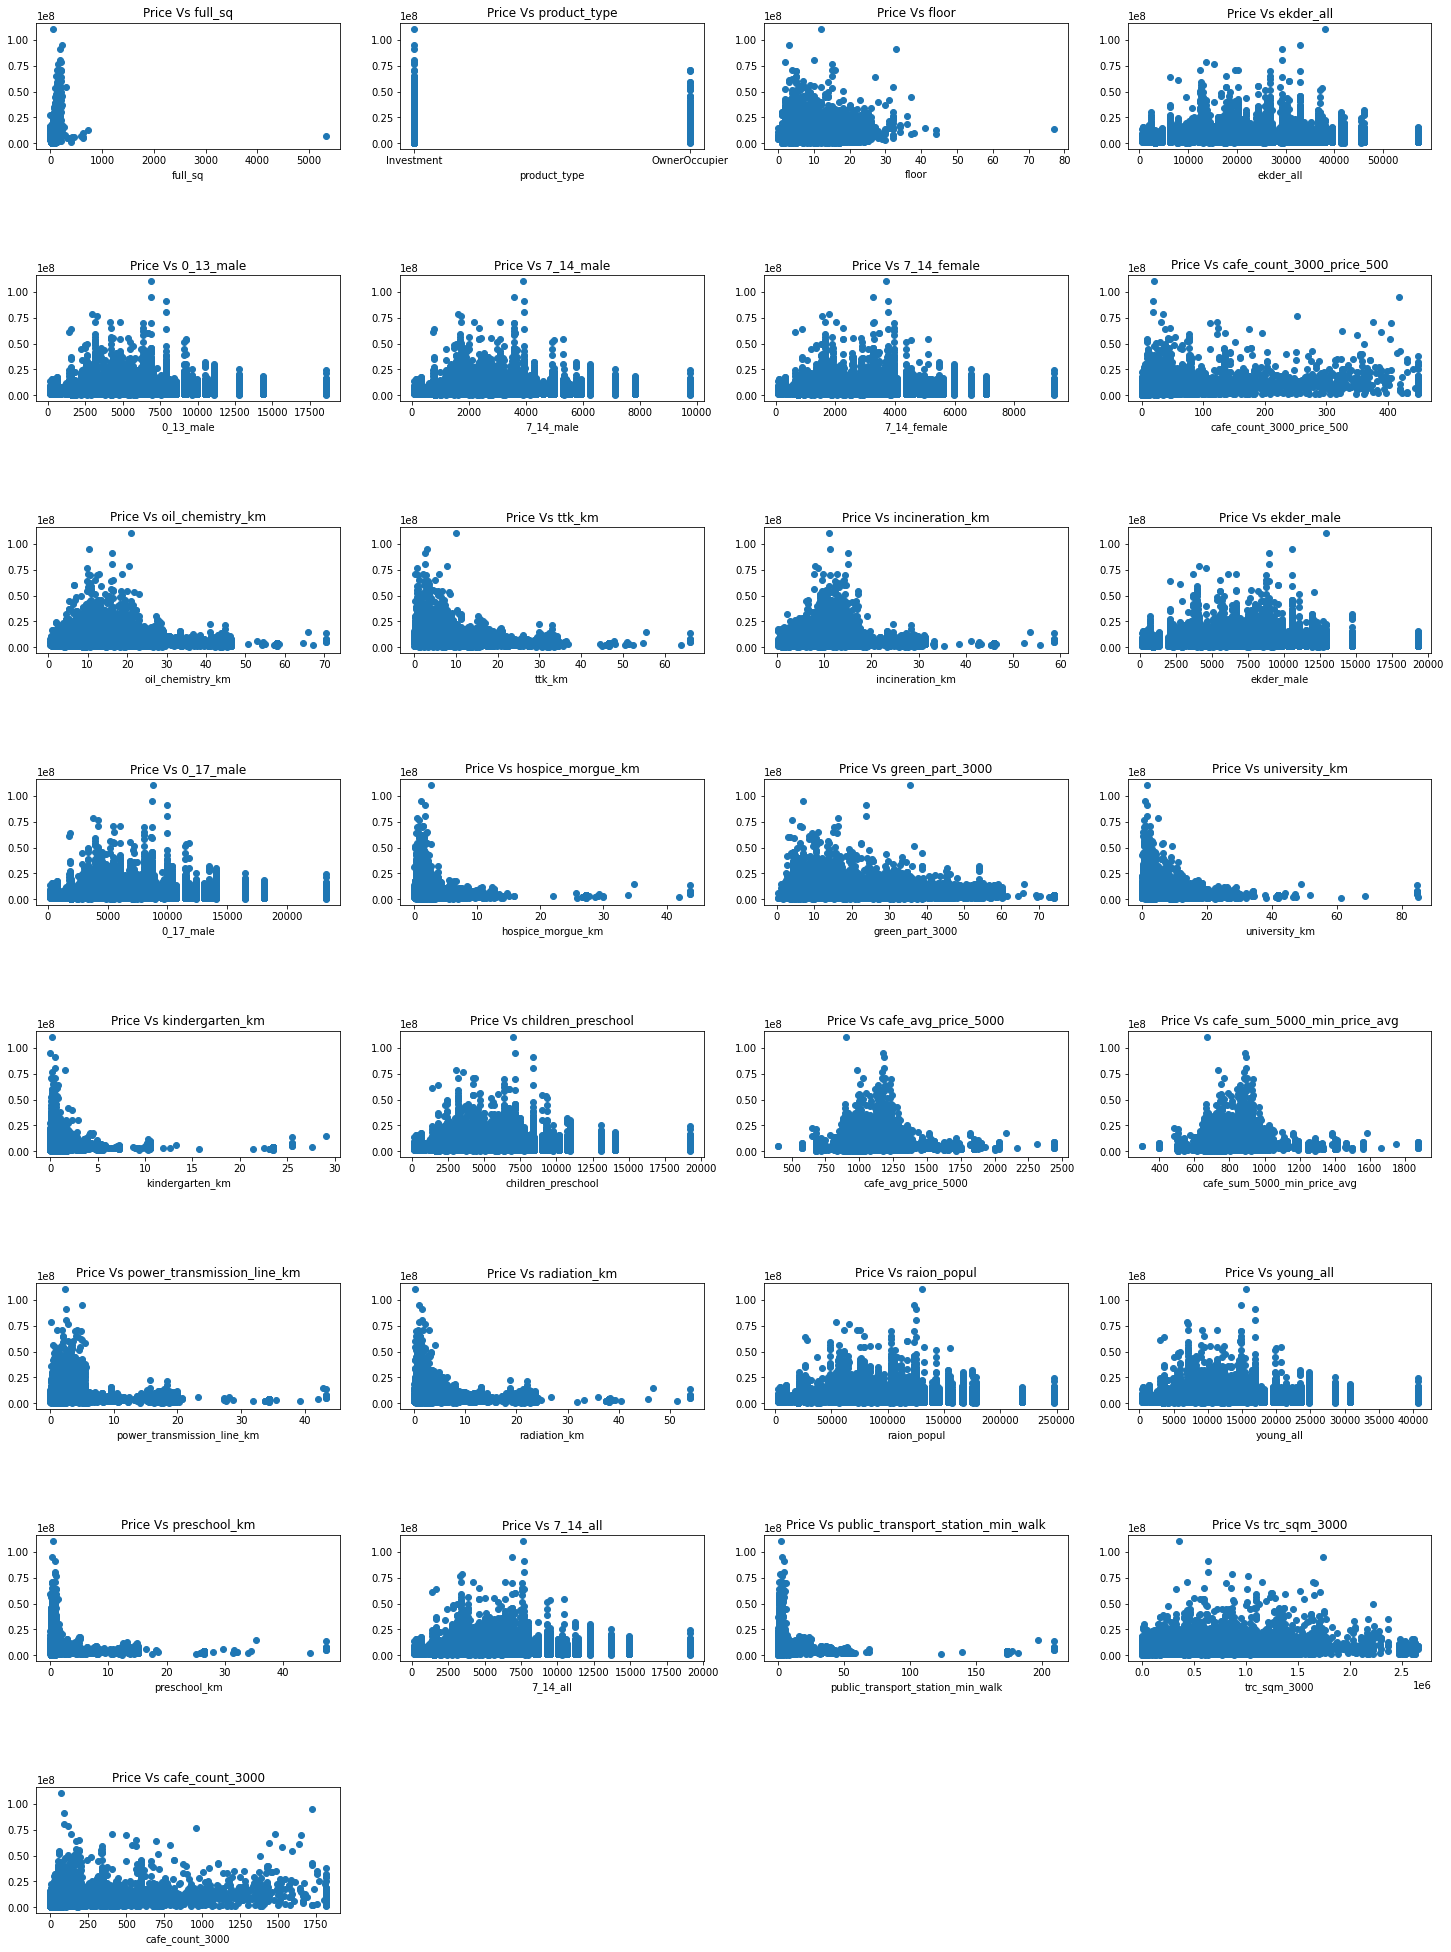

In [163]:
top_features = [features[i] for i in indices]

plt.figure(figsize=(25,30))
count = 0
for i in top_features:

  plt.subplot(8,4,count+1)
  plt.subplots_adjust( top=1, wspace=0.2, hspace=1)
  plt.scatter(train_data[i],train_data['price_doc'])
  plt.xlabel(i)
  plt.title('Price Vs '+i)
  count = count+1

plt.show()

#  from these graph, i can say that the price of the house is high if all these facilities is nearer to the house:

<pre>
1. kindergarten_km : Play School 
2. hospice_morgue_km : Hospital
3. incineration_km : waste treatment Plant
4. basketball_km : BasketBall Court
5. railroad_km : Railway Sation
6. sadovoe_km
7. railroad_station_walk_km: Railway Station
8. museum_km : Museum
9. public_tansport_sation_min_km : Public Transport
10. metro_km_walk : Metro Station
11. school_km : School
12. big_church_km : Church
13. green_zone_km : Green area from the House
14. hospice_morgue_km
15. Power_transmission_line_km
</pre>

#Price of the house is inversely proportional to the distance of these facilities.

#In other words we can say that the price of the house is high if these facilities are closer to the house.

<h1> Summary : </h1><br>

1. There are 51 columns which has missing values we can either chose to remove all or we can set a threshold for removing these columns.

2. We will set 10% as threshold i.e. we will consider only those features which has the missing values less than 10%. 

3. num_room has almost 31% of missing data, but num_room and full_sq are highly correlated to each other hence we can    choose to drop num_room and consider full_sq.

4. To fill these missing values we can take mode for categorical features and median for numerical features, since all the missing features have data type float hence we will fill missing values by median.

5. Our data contains Collinearity, hence we have to remove highly correlated data for the better performance. We can choose the columns to be removed by analysing the correlation matrices.

6. We have analyse the features based on the correlation values with respect to the price_doc,we have divided our big correration matrix in to four parts based on correlation value with respect to price_doc. we only have analyse the data which have correlation value with respect to price_doc greater than 0.10 and from my opinion the correlation value with respect to price_doc less than 0.10 will not add any importance to the model, hence we can choose to remove all the features which have correlation value with respect to price_doc less than 0.10.

7. Our data do have outliers and i have used quartile to remove the outliers in this notebook.